# EVALUATION SOMMATIVE 3 : EXPLORATION DES DONNEES

**Auteurs:** 
- Angèle Blandine Feussi Nguemkam 
- Willy Stanlin Taguedong
- Thierry Pascal Zokou Tchokonthe
- Sorel Aniel Fotsing Mba
              
**Date :** 08 decembre 2025

---

## 1. Contexte & Données

-**Problématique et hypothèses**:

Cet ensemble de données contient des informations sur les paiements en défaut, les facteurs démographiques, les données de crédit, l'historique des paiements et les relevés de compte des clients de cartes de crédit à Taïwan d'avril 2005 à septembre 2005.


L’objectif de cette étude est de:
- Determiner Comment la probabilité de défaut de paiement varie-t-elle selon les différentes variables démographiques 
- Ressortir toutes les variables qui prédisent le mieux un défaut de paiement 

- **Chemin d’accès / versioning des données**:

Nom du fichier local : Default of Credit Card Clients .

Source officielle : kaggle

## 1. Importation des Bibliotheques necessiares et des donnees

In [1]:
# Import des librairies
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import prince

sns.set_palette("husl")
plt.style.use("seaborn-v0_8")

In [2]:
credit = fetch_ucirepo(id=350)
X = credit.data.features
y = credit.data.targets
df = pd.concat([X, y], axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# 1. Récupérer la table des variables depuis ucimlrepo
var_table = credit.variables

# 2. Construire dynamiquement le dictionnaire de renommage
rename_dict = {
    row["name"]: row["description"]
    for _, row in var_table.iterrows()
    if row["name"] in df.columns    # seulement si la colonne existe dans le dataset
}

# 3. Appliquer le renommage
df = df.rename(columns=rename_dict)

# 4. Affichage du DataFrame renommé
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Liste complète des variables

| Nom de la variable              | Description                                                                       |
|---------------------------------|-----------------------------------------------------------------------------------|
| *LIMIT_BAL*                   | Montant de la limite de crédit (crédit personnel + crédit familial)               |
| *SEX*                         | Sexe du client (1 = homme, 2 = femme)                                             |
| *EDUCATION*                   | Niveau d’éducation (1 = graduate, 2 = university, 3 = high school, 4 = others)    |
| *MARRIAGE*                    | État matrimonial (1 = marié, 2 = célibataire, 3 = autre)                          |
| *AGE*                         | Âge du client                                                                     |
| *PAY_0*                       | Statut de remboursement en septembre (−1 = payé à temps, 1 = retard 1 mois, etc.) |
| *PAY_2*                       | Statut de remboursement en août                                                   |
| *PAY_3*                       | Statut de remboursement en juillet                                                |
| *PAY_4*                       | Statut de remboursement en juin                                                   |
| *PAY_5*                       | Statut de remboursement en mai                                                    |
| *PAY_6*                       | Statut de remboursement en avril                                                  |
| *BILL_AMT1*                   | Montant de la facture de septembre                                                |
| *BILL_AMT2*                   | Montant de la facture d’août                                                      |
| *BILL_AMT3*                   | Montant de la facture de juillet                                                  |
| *BILL_AMT4*                   | Montant de la facture de juin                                                     |
| *BILL_AMT5*                   | Montant de la facture de mai                                                      |
| *BILL_AMT6*                   | Montant de la facture d’avril                                                     |
| *PAY_AMT1*                    | Montant payé en septembre                                                         |
| *PAY_AMT2*                    | Montant payé en août                                                              |
| *PAY_AMT3*                    | Montant payé en juillet                                                           |
| *PAY_AMT4*                    | Montant payé en juin                                                              |
| *PAY_AMT5*                    | Montant payé en mai                                                               |
| *PAY_AMT6*                    | Montant payé en avril                                                             |
| *default payment next month*  | Variable cible : défaut de paiement le mois suivant (1 = oui, 0 = non)            |

### Dimensions du dataset

* *Nombre total de lignes :* 30 000 clients
* *Nombre total de colonnes :* 24

  * **23 variables explicatives **
  * *1 variable cible (Y)*

## 2. Verification de l'exhaustivité  des colonnes et enregistrement

In [4]:
# Taux de complétude par colonne
completude = (df.notna().mean().sort_values(ascending=True)*100).round(2) 
display(completude.to_frame("taux_completude_%"))


,taux_completude_%
LIMIT_BAL,100.0
PAY_AMT5,100.0
PAY_AMT4,100.0
PAY_AMT3,100.0
PAY_AMT2,100.0
PAY_AMT1,100.0
BILL_AMT6,100.0
BILL_AMT5,100.0
BILL_AMT4,100.0
BILL_AMT3,100.0


### 2.1 Documentation
#### a) Anomalies detectées
Aucune anomalie n'a ete detectée, les données ne continnent aucune valeurs manquante 

## 3. verifcation des doublons

In [5]:
df.duplicated().sum()

35

### 3.1 Documentation
#### a) Anomalies detectées
Aucune anomalie n'a ete detectée, les données ne continnent aucun doublons

## 4. Detection  et correction des anomalies et incoherences des noms des colonnes
### 4.1  Detection 

In [6]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
#Affichage des types de données
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [9]:
print("Valeurs uniques de EDUCATION :", sorted(df["EDUCATION"].unique()))
print("Valeurs uniques de MARRIAGE  :", sorted(df["MARRIAGE"].unique()))
print("Valeurs uniques de PAY_0     :", sorted(df["PAY_0"].unique()))
print("Valeurs uniques de PAY_2     :", sorted(df["PAY_2"].unique()))
print("Valeurs uniques de PAY_3     :", sorted(df["PAY_3"].unique()))
print("Valeurs uniques de PAY_4     :", sorted(df["PAY_4"].unique()))
print("Valeurs uniques de PAY_5     :", sorted(df["PAY_5"].unique()))
print("Valeurs uniques de PAY_6     :", sorted(df["PAY_6"].unique()))


Valeurs uniques de EDUCATION : [0, 1, 2, 3, 4, 5, 6]
Valeurs uniques de MARRIAGE  : [0, 1, 2, 3]
Valeurs uniques de PAY_0     : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques de PAY_2     : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques de PAY_3     : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques de PAY_4     : [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques de PAY_5     : [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
Valeurs uniques de PAY_6     : [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [10]:
def detect_incoherences_raw(df):
    errors = []
    print("=== DÉTECTION DES INCOHÉRENCES ===\n")

    # 1) Variable cible binaire
    cible_vals = set(df["default payment next month"].unique())
    if not cible_vals.issubset({0, 1}):
        errors.append(f"Variable cible contient des valeurs invalides : {cible_vals}")

    # 2) SEX (doit être 1 ou 2)
    vals_sex = set(df["SEX"].unique())
    bad_sex = vals_sex - {1, 2}
    if bad_sex:
        n_bad = df[~df["SEX"].isin([1, 2])].shape[0]
        errors.append(f"SEX contient des valeurs incohérentes {bad_sex} (lignes concernées : {n_bad})")

    # 3) EDUCATION (valeurs autorisées : 1,2,3,4)
    vals_edu = set(df["EDUCATION"].unique())
    bad_edu = vals_edu - {1, 2, 3, 4}
    if bad_edu:
        n_bad = df[~df["EDUCATION"].isin([1, 2, 3, 4])].shape[0]
        errors.append(f"EDUCATION contient des catégories non documentées {bad_edu} (lignes concernées : {n_bad})")

    # 4) MARRIAGE (valeurs autorisées : 1,2,3)
    vals_marr = set(df["MARRIAGE"].unique())
    bad_marr = vals_marr - {1, 2, 3}
    if bad_marr:
        n_bad = df[~df["MARRIAGE"].isin([1, 2, 3])].shape[0]
        errors.append(f"MARRIAGE contient des catégories non documentées {bad_marr} (lignes concernées : {n_bad})")

    # 5) AGE aberrants (<15 ou >100)
    bad_age_mask = (df["AGE"] < 15) | (df["AGE"] > 100)
    if bad_age_mask.any():
        errors.append(f"AGE contient {bad_age_mask.sum()} valeurs aberrantes (<15 ou >100).")

    # 6) LIMIT_BAL doit être > 0
    bad_lim_mask = df["LIMIT_BAL"] <= 0
    if bad_lim_mask.any():
        errors.append(f"LIMIT_BAL contient {bad_lim_mask.sum()} valeurs négatives ou nulles.")

    # 7) PAY_x doivent ∈ {-1,0,1,...,9}
    allowed_pay = set([-1] + list(range(0, 10)))
    pay_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
    for col in pay_cols:
        vals = set(df[col].unique())
        bad_vals = vals - allowed_pay
        if bad_vals:
            n_bad = df[~df[col].isin(allowed_pay)].shape[0]
            errors.append(f"{col} contient des valeurs incohérentes {bad_vals} (lignes concernées : {n_bad})")

    # --- AFFICHAGE ---
    if not errors:
        print("✔ Aucune incohérence détectée selon les règles métier.\n")
    else:
        print("❌ Incohérences détectées :")
        for e in errors:
            print(" -", e)
        print("\nNombre total de types d'incohérences :", len(errors))

    return errors


In [11]:
detect_incoherences_raw(df)


=== DÉTECTION DES INCOHÉRENCES ===

❌ Incohérences détectées :
 - EDUCATION contient des catégories non documentées {0, 5, 6} (lignes concernées : 345)
 - MARRIAGE contient des catégories non documentées {0} (lignes concernées : 54)
 - PAY_0 contient des valeurs incohérentes {-2} (lignes concernées : 2759)
 - PAY_2 contient des valeurs incohérentes {-2} (lignes concernées : 3782)
 - PAY_3 contient des valeurs incohérentes {-2} (lignes concernées : 4085)
 - PAY_4 contient des valeurs incohérentes {-2} (lignes concernées : 4348)
 - PAY_5 contient des valeurs incohérentes {-2} (lignes concernées : 4546)
 - PAY_6 contient des valeurs incohérentes {-2} (lignes concernées : 4895)

Nombre total de types d'incohérences : 8


['EDUCATION contient des catégories non documentées {0, 5, 6} (lignes concernées : 345)',
 'MARRIAGE contient des catégories non documentées {0} (lignes concernées : 54)',
 'PAY_0 contient des valeurs incohérentes {-2} (lignes concernées : 2759)',
 'PAY_2 contient des valeurs incohérentes {-2} (lignes concernées : 3782)',
 'PAY_3 contient des valeurs incohérentes {-2} (lignes concernées : 4085)',
 'PAY_4 contient des valeurs incohérentes {-2} (lignes concernées : 4348)',
 'PAY_5 contient des valeurs incohérentes {-2} (lignes concernées : 4546)',
 'PAY_6 contient des valeurs incohérentes {-2} (lignes concernées : 4895)']

## 4.2 Documentation
#### a) Anomalies detectées
**Nom de colonnes** : l'ecriture du nom des colonnes n'est pas uniforme et est non conforme aux conventions (snake case  ou Camel case), Certaines colonnes sont en minuscule et separées d'un point pendant que d'autres sont completement en majuscule ('default.payment.next.month')et separées d'un tiret(LIMIT_BAL)

**Types de variables**: le dataset sur lequel nous travaillons a déja été  encodé ce qui justifie le fait que toutes nos variables soient de types numeriques(int64 et float64).cependant, d'àpres le dictionnaire de données les variables "Sexe, Education ,mariage et lètat de remboursement " sont de types categorielles

**Incoherences** L’analyse des valeurs uniques et la comparaison avec la documentation officielle du dataset UCI ont permis d’identifier plusieurs incohérences :

- des modalités non documentées pour EDUCATION (0, 5, 6) ;
- une modalité non documentée pour MARRIAGE (0) ;
- des valeurs -2 dans les variables PAY_0 à PAY_6, en dehors de l’échelle prévue (−1, 0, 1…9).

#### b)Correction
**Nom de colonnes** : la convention snake case sera utilisé pour harmoniser les noms des colonnes 

**Types de variables:** Etant donné que des analyses de l'AFC seront faites, les colonnes categorielles seront transformées en leur format inital.

**Incoherences** Pour corriger ces incohérences tout en respectant la signification économique des variables, les décisions suivantes ont été prises :

- les valeurs 0, 5 et 6 de EDUCATION ont été regroupées dans la catégorie « 4 = autres » ;
- la valeur 0 de MARRIAGE a été recodée en « 3 = autres » ;
-  les valeurs −2 des variables PAY_x ont été recodées en −1, correspondant à un paiement à l’échéance.

Après ces corrections, une nouvelle vérification des règles métier  confirmera l’absence d’incohérences résiduelles, ce qui fournit une base de données cohérente pour l’analyse multivariée et la modélisation.

## 4.3 Correction

In [12]:
# Correction des incoherences 
# 1. Correction de EDUCATION : valeurs 0, 5 et 6 → 4 ("autres")
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})

# 2. Correction de MARRIAGE : valeur 0 → 3 ("autres")
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})

# 3. Correction des valeurs PAY_x : -2 et 0 → -1 (paiement à l’échéance)
pay_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
df[pay_cols] = df[pay_cols].replace(-2, -1)
df[pay_cols] = df[pay_cols].replace(0, -1)


In [13]:
# validation apres correction
detect_incoherences_raw(df)


=== DÉTECTION DES INCOHÉRENCES ===

✔ Aucune incohérence détectée selon les règles métier.



[]

In [14]:
# Correction du nom des colonnes
df.columns = (
    df.columns
        .str.strip()           # Supprimer les espaces début/fin
        .str.lower()           # Mettre en minuscule
        .str.replace("-", " ", regex=False)    # Normaliser les séparateurs
        .str.replace(".", " ", regex=False)
        .str.replace(" ", "_", regex=False)    # Remplacer espaces par _
        # Les lignes ci-dessous sont optionnelles, vu que tes colonnes sont déjà ASCII
        .str.normalize("NFKD")
        .str.encode("ascii", errors="ignore")
        .str.decode("utf-8")
)

print("Après transformation :")
print(df.columns)


Après transformation :
Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')


In [15]:
df_trans  =df.copy()


In [16]:
df_trans.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,-1,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,-1,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
# Fonction de décodage pour le dataset harmonisé (snake_case)

def decode_Credit_df(df):
    df_decoded = df.copy()

    # Dictionnaire de décodage avec noms harmonisés
    decode_map = {
        'sex': {1: 'male', 2: 'female'},
        'education': {1: 'graduate school', 2: 'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown'},
        'marriage': {1: 'married', 2: 'single', 3:'others'},
        'pay_0': {-1: 'pay duly', 1: 'payment delay for one month',
                  2:'payment delay for two months', 3:'payment delay for three months', 
                  4:'payment delay for four months', 5:'payment delay for five months', 
                  6:'payment delay for six months', 7:'payment delay for seven months',
                  8:'payment delay for eight months', 9:'payment delay for nine months and above'},
        'pay_2': {-1: 'pay duly', 1: 'payment delay for one month',
                  2:'payment delay for two months', 3:'payment delay for three months', 
                  4:'payment delay for four months', 5:'payment delay for five months', 
                  6:'payment delay for six months', 7:'payment delay for seven months',
                  8:'payment delay for eight months', 9:'payment delay for nine months and above'},
        'pay_3': {-1: 'pay duly', 1: 'payment delay for one month',
                  2:'payment delay for two months', 3:'payment delay for three months', 
                  4:'payment delay for four months', 5:'payment delay for five months', 
                  6:'payment delay for six months', 7:'payment delay for seven months',
                  8:'payment delay for eight months', 9:'payment delay for nine months and above'},
        'pay_4': {-1: 'pay duly', 1: 'payment delay for one month',
                  2:'payment delay for two months', 3:'payment delay for three months', 
                  4:'payment delay for four months', 5:'payment delay for five months', 
                  6:'payment delay for six months', 7:'payment delay for seven months',
                  8:'payment delay for eight months', 9:'payment delay for nine months and above'},
        'pay_5': {-1: 'pay duly', 1: 'payment delay for one month',
                  2:'payment delay for two months', 3:'payment delay for three months', 
                  4:'payment delay for four months', 5:'payment delay for five months', 
                  6:'payment delay for six months', 7:'payment delay for seven months',
                  8:'payment delay for eight months', 9:'payment delay for nine months and above'},
        'pay_6': {-1: 'pay duly', 1: 'payment delay for one month',
                  2:'payment delay for two months', 3:'payment delay for three months', 
                  4:'payment delay for four months', 5:'payment delay for five months', 
                  6:'payment delay for six months', 7:'payment delay for seven months',
                  8:'payment delay for eight months', 9:'payment delay for nine months and above'},
    }

    # Application du décodage
    for col, mapping in decode_map.items():
        if col in df_decoded.columns:
            df_decoded[col] = df_decoded[col].map(mapping)

    return df_decoded


# Exemple d’utilisation
df_decoded = decode_Credit_df(df)
df_decoded.head()


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,20000,female,university,married,24,payment delay for two months,payment delay for two months,pay duly,pay duly,pay duly,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,pay duly,payment delay for two months,pay duly,pay duly,pay duly,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,pay duly,pay duly,pay duly,pay duly,pay duly,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,pay duly,pay duly,pay duly,pay duly,pay duly,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,pay duly,pay duly,pay duly,pay duly,pay duly,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
df_decoded.dtypes

limit_bal                      int64
sex                           object
education                     object
marriage                      object
age                            int64
pay_0                         object
pay_2                         object
pay_3                         object
pay_4                         object
pay_5                         object
pay_6                         object
bill_amt1                      int64
bill_amt2                      int64
bill_amt3                      int64
bill_amt4                      int64
bill_amt5                      int64
bill_amt6                      int64
pay_amt1                       int64
pay_amt2                       int64
pay_amt3                       int64
pay_amt4                       int64
pay_amt5                       int64
pay_amt6                       int64
default_payment_next_month     int64
dtype: object

## Analyse univariée
### variables quantitatives

In [19]:
# df_decoded=df.copy()
# Separation des variables
colonnes_numeriques = df_decoded.select_dtypes(include=['float64', 'int64']).columns
display("Variables numériques :", list(colonnes_numeriques))

'Variables numériques :'

['limit_bal',
 'age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default_payment_next_month']

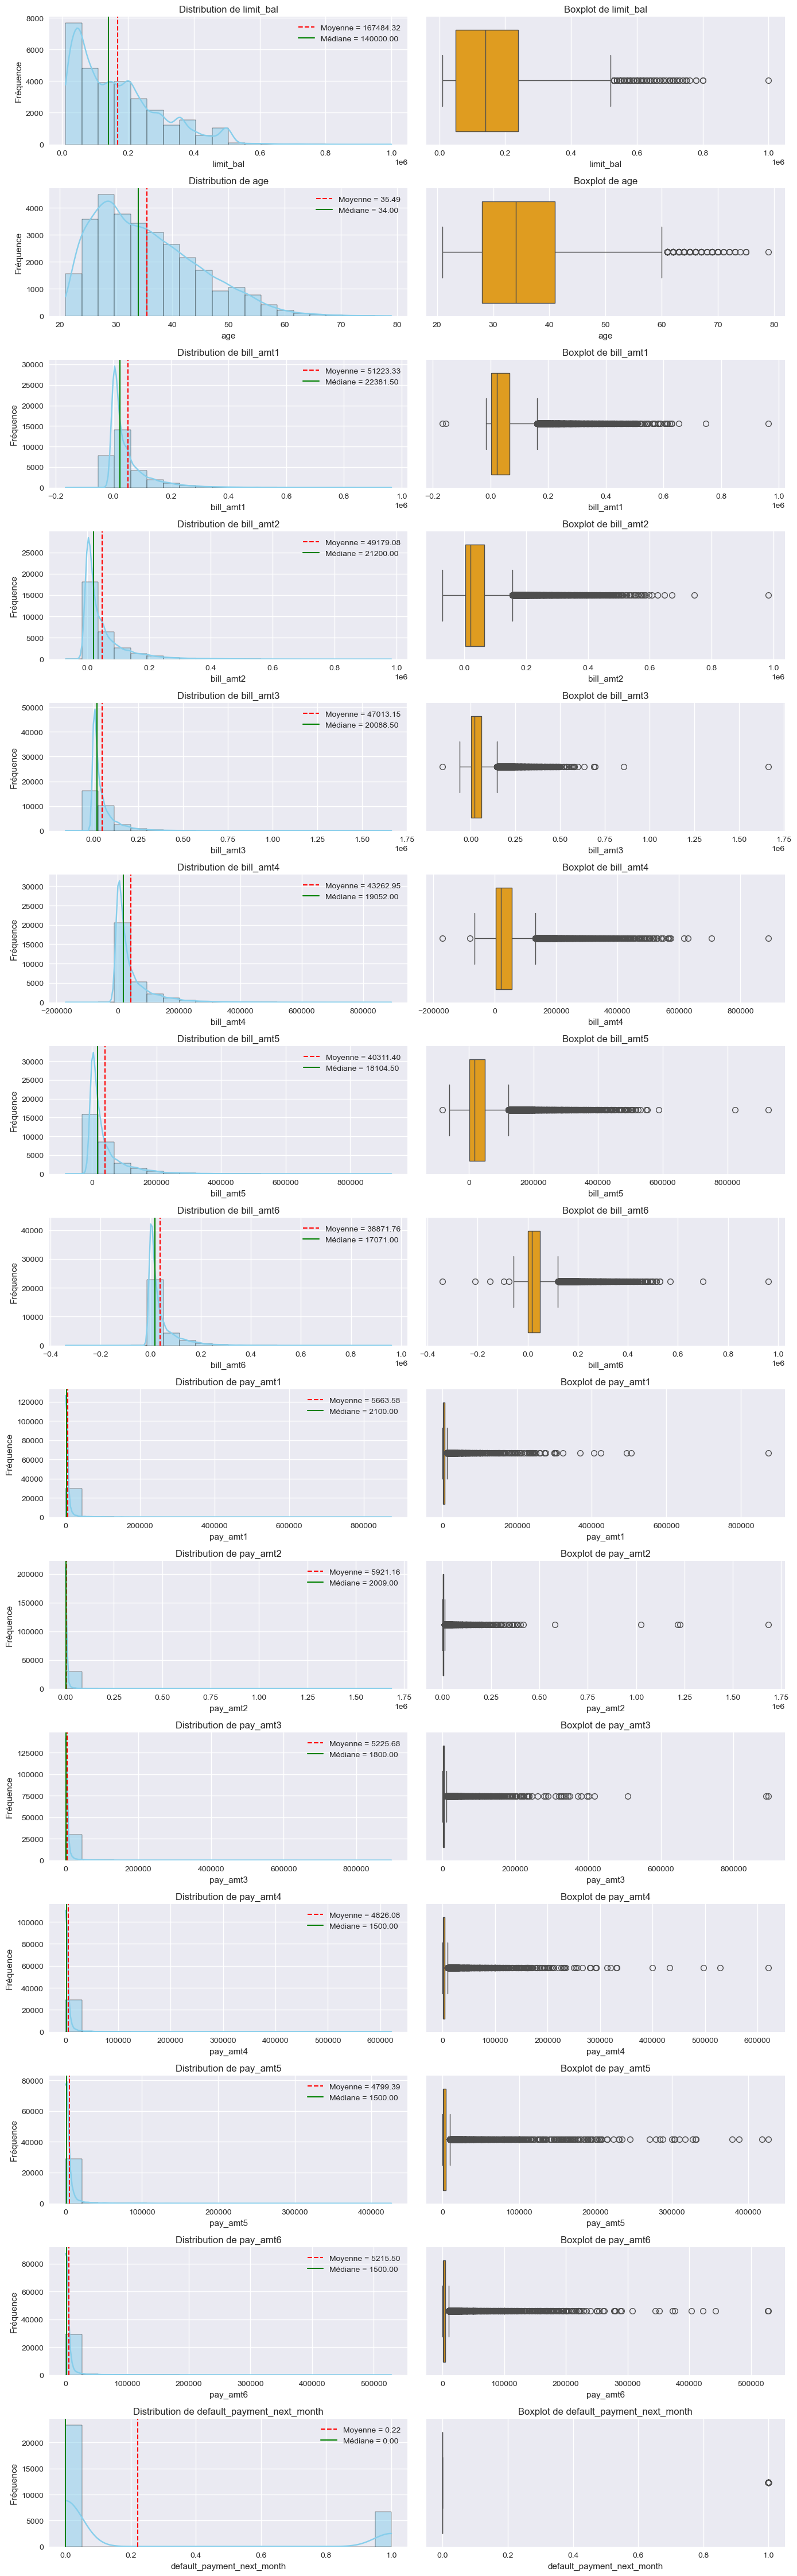

In [20]:

import math

# Nombre total de variables
n = len(colonnes_numeriques)
cols = 2  # histogramme + boxplot
rows = n  # une ligne par variable

# Taille globale de la figure
plt.figure(figsize=(14, rows * 3))

for i, col in enumerate(colonnes_numeriques):

    # -------------------------------
    #  HISTOGRAMME AVEC MOYENNE & MÉDIANE
    # -------------------------------
    plt.subplot(rows, cols, 2*i + 1)
    sns.histplot(df_decoded[col].dropna(), kde=True, color='skyblue', bins=20)

    # Calculs
    mean_val = df_decoded[col].mean()
    median_val = df_decoded[col].median()

    # Lignes moyenne & médiane
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Moyenne = {mean_val:.2f}")
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f"Médiane = {median_val:.2f}")

    # Titre + légende
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.legend()

    # -------------------------------
    #  BOXPLOT
    # -------------------------------
    plt.subplot(rows, cols, 2*i + 2)
    sns.boxplot(x=df_decoded[col], color='orange')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)

# Ajustement des espacements
plt.tight_layout()
plt.show()


### Interpretation de l'analyse univariee
**- LIMIT_BAL (Montant du crédit accordé)** : La limite de crédit est très dispersée et fortement asymétrique, avec une majorité de clients à faible/moyenne limite et quelques clients très fortement dotés.

**- AGE** :  La clientèle est majoritairement jeune à d’âge moyen (20–50 ans), avec peu de clients au-delà de 60 ans.

**- BILL_AMT1–6 (montants facturés)**: Les montants facturés mensuels présentent des distributions similaires, très asymétriques avec de nombreux montants élevés isolés. Cela suggère une forte corrélation entre les différents mois.

**- PAY_AMT1–6 (montants payés)**: Les montants payés sont très hétérogènes : la majorité des clients paient des montants faibles, alors qu’une minorité effectue des paiements très élevés. »

**- default_payment_next_month**: La variable cible est déséquilibrée, avec une proportion de clients en défaut nettement inférieure à celle des clients non défaillants. »

detection 

les variables sont tres dispersees, elles devront être standardisées avant ACP / clustering.



In [21]:
# Copier le dataframe pour ne pas écraser les données d'origine
df_decoded= df_decoded.copy()

# Sélectionner uniquement les colonnes numériques
num_cols = df_decoded.select_dtypes(include=['int64', 'float64']).columns
num_cols=num_cols.drop('default_payment_next_month')

for col in num_cols:
    Q1 = df_decoded[col].quantile(0.25)
    Q3 = df_decoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Remplacer les valeurs aberrantes par les bornes
    df_decoded[col] = df_decoded[col].clip(lower, upper)


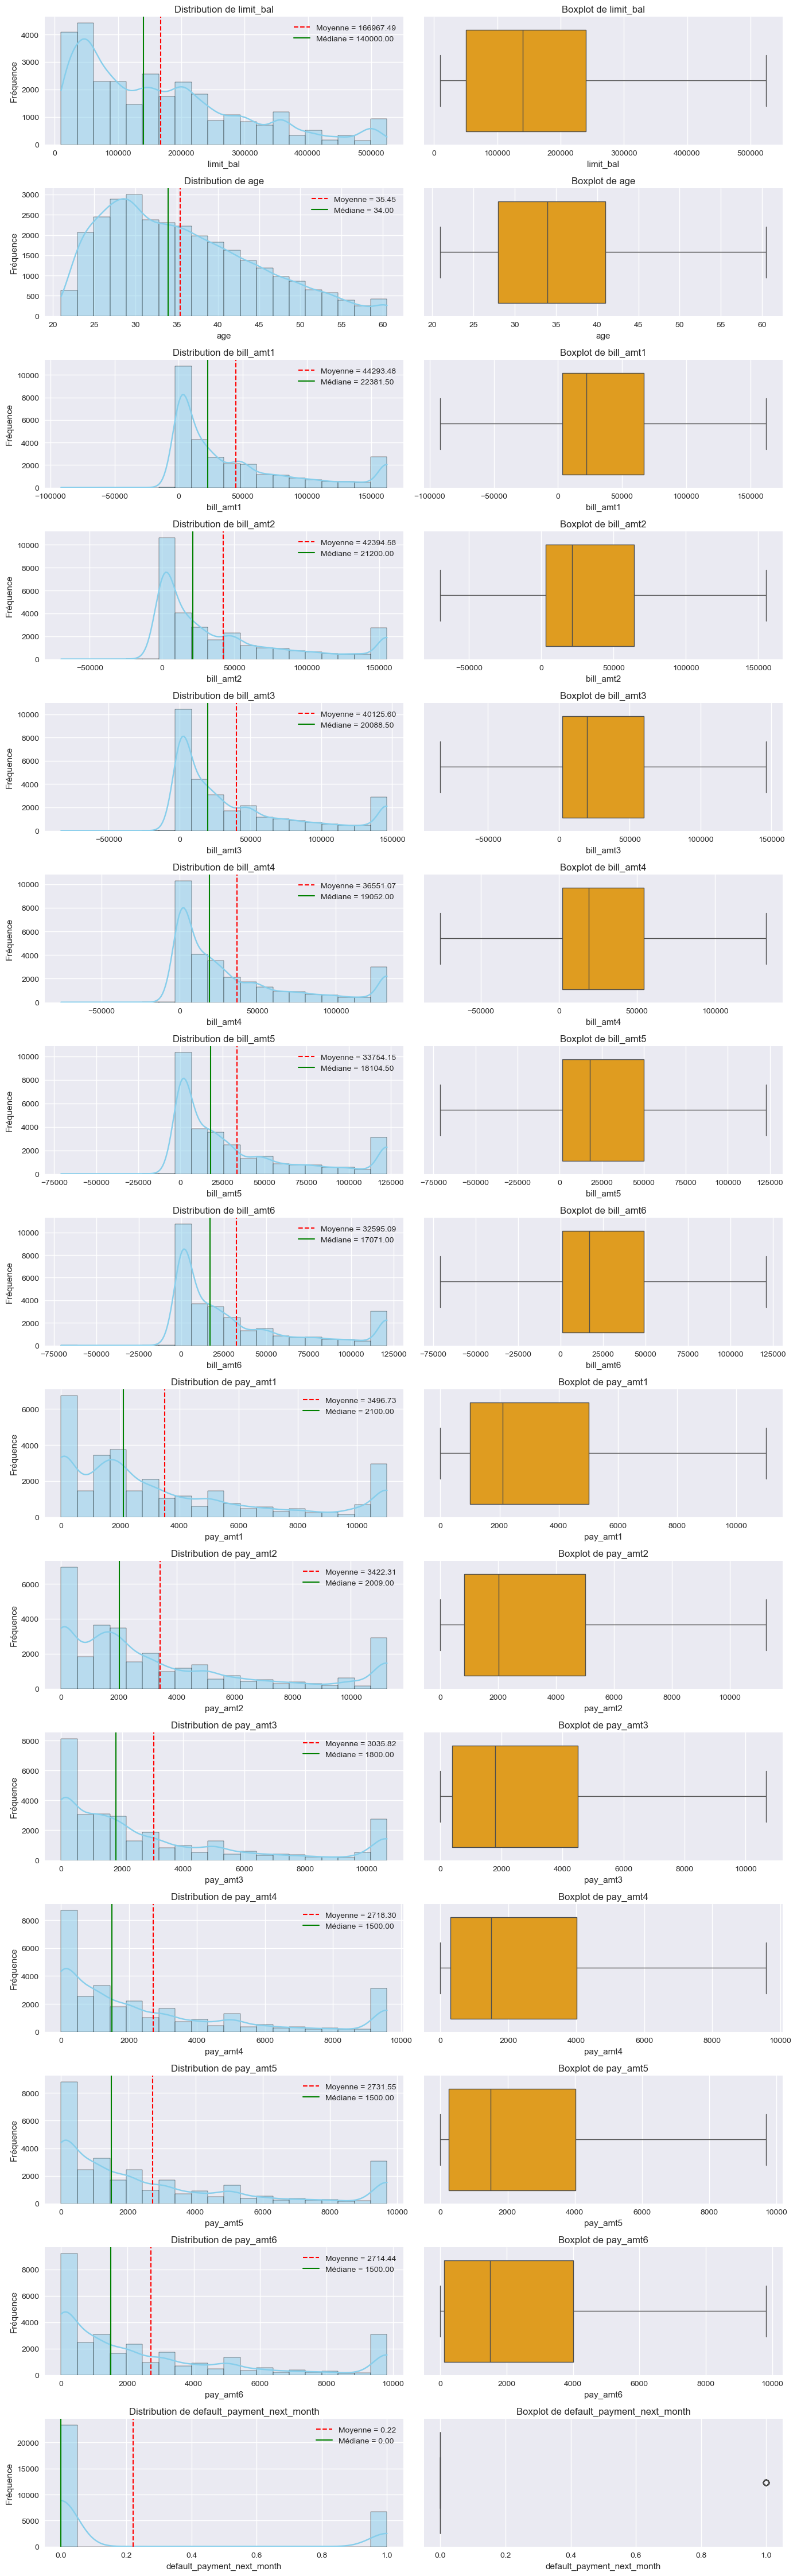

In [22]:

import math

# Nombre total de variables
n = len(colonnes_numeriques)
cols = 2  # histogramme + boxplot
rows = n  # une ligne par variable

# Taille globale de la figure
plt.figure(figsize=(14, rows * 3))

for i, col in enumerate(colonnes_numeriques):

    # -------------------------------
    #  HISTOGRAMME AVEC MOYENNE & MÉDIANE
    # -------------------------------
    plt.subplot(rows, cols, 2*i + 1)
    sns.histplot(df_decoded[col].dropna(), kde=True, color='skyblue', bins=20)

    # Calculs
    mean_val = df_decoded[col].mean()
    median_val = df_decoded[col].median()

    # Lignes moyenne & médiane
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Moyenne = {mean_val:.2f}")
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f"Médiane = {median_val:.2f}")

    # Titre + légende
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.legend()

    # -------------------------------
    #  BOXPLOT
    # -------------------------------
    plt.subplot(rows, cols, 2*i + 2)
    sns.boxplot(x=df_decoded[col], color='orange')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)

# Ajustement des espacements
plt.tight_layout()
plt.show()


### variables qualitatives

In [23]:
colonnes_categorielles = df_decoded.select_dtypes(include=['object']).columns
display("Variables categorielles :", list(colonnes_categorielles))

'Variables categorielles :'

['sex',
 'education',
 'marriage',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6']

In [24]:
#dictionnaire de labels courts pour les variables de paiement
rename_pay = {
    'pay duly': '0 mois',
    'payment delay for one month': '1 mois',
    'payment delay for two months': '2 mois',
    'payment delay for three months': '3 mois',
    'payment delay for four months': '4 mois',
    'payment delay for five months': '5 mois',
    'payment delay for six months': '6 mois',
    'payment delay for seven months': '7 mois',
    'payment delay for eight months': '8 mois'
}
pay_cols = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

for col in pay_cols:
    df_decoded[col] = df_decoded[col].replace(rename_pay)


C:\Users\USER\AppData\Local\Temp\ipykernel_22136\2765081234.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_22136\2765081234.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_22136\2765081234.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_22136\2765081234.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_22136\2765081234.py:13: FutureWarning: 

Passing `palette` withou

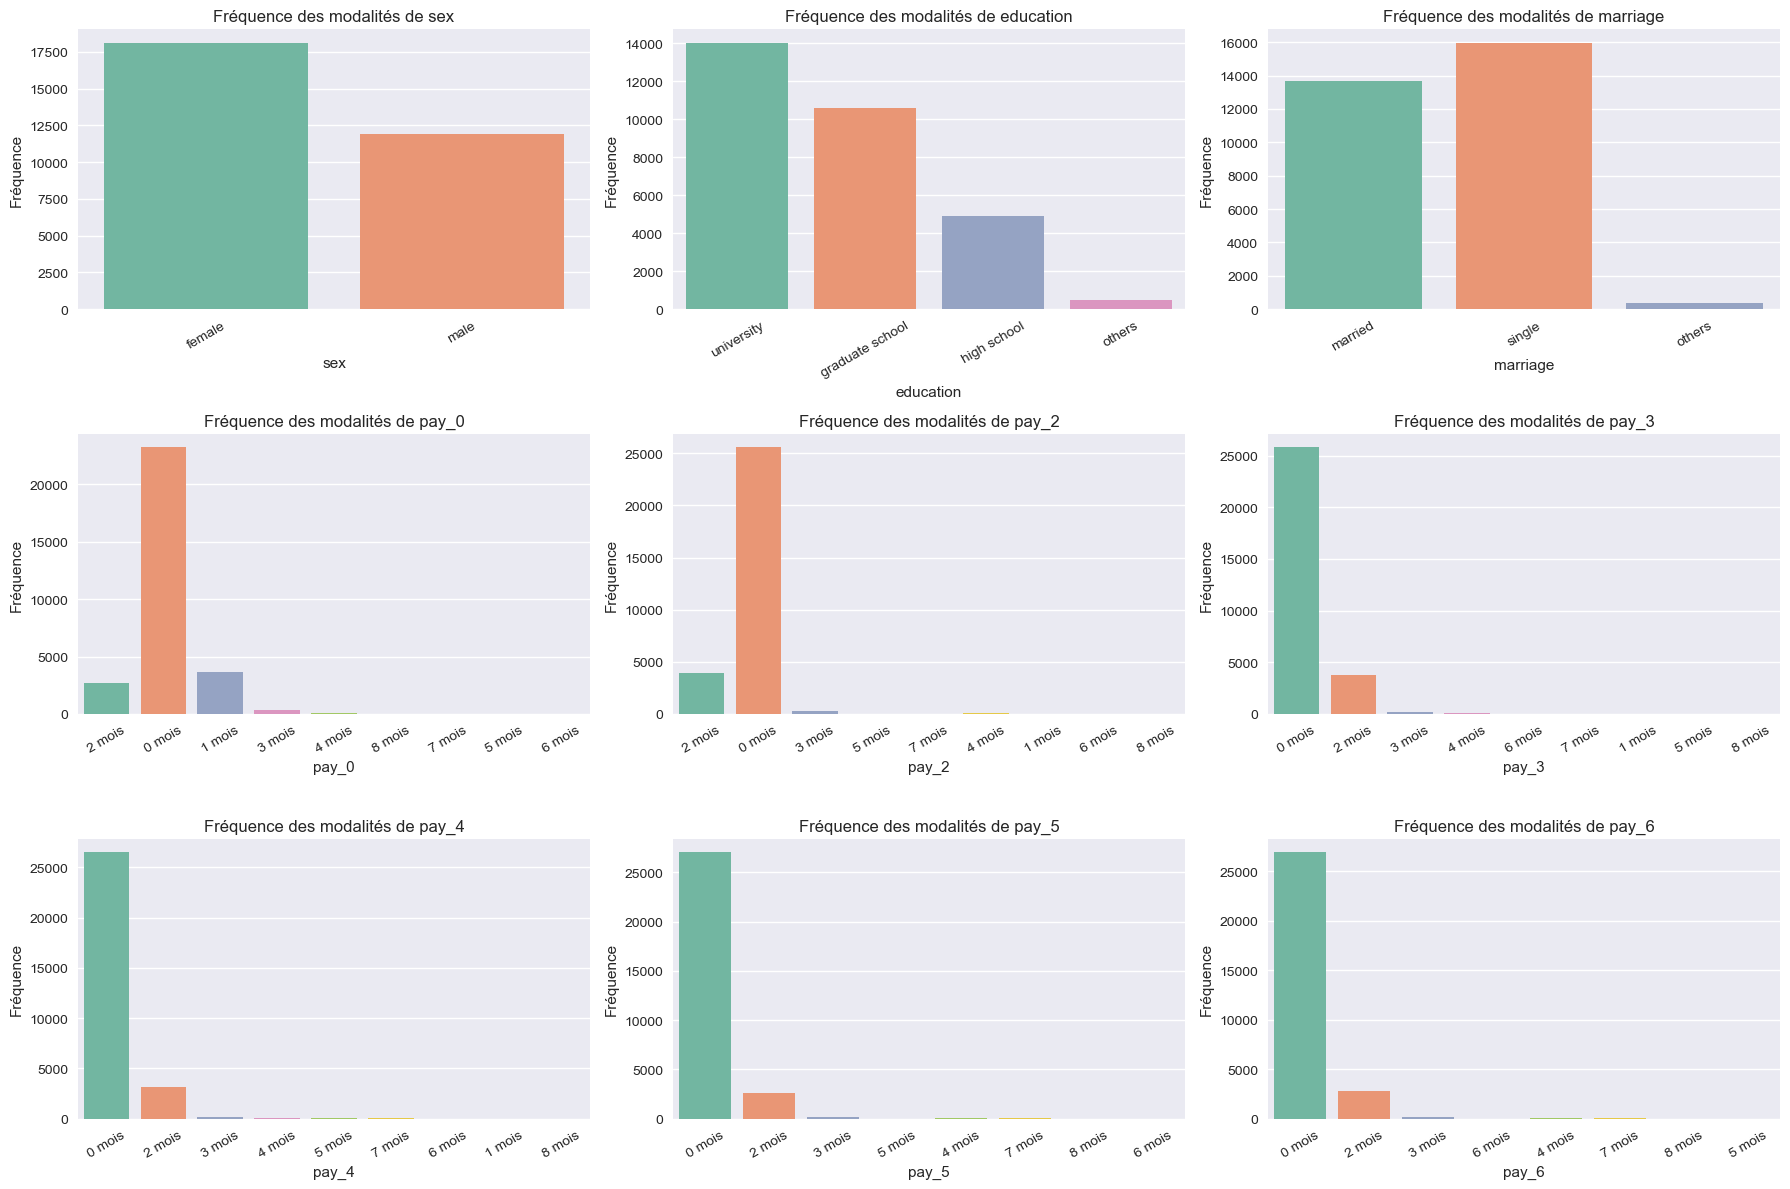

In [25]:
colonnes_categorielles = ['sex','education','marriage',
                          'pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

palette = sns.color_palette("Set2", 10)

n = len(colonnes_categorielles)
rows = math.ceil(n / 3)

fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
axes = axes.flatten()

for i, col in enumerate(colonnes_categorielles):
    sns.countplot(
        data=df_decoded,
        x=col,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f"Fréquence des modalités de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")
    axes[i].tick_params(axis='x', rotation=30)

# Masquer seulement les axes en trop
for j in range(n, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


L’analyse des variables catégorielles montre que l’échantillon est composé majoritairement de femmes et de personnes ayant un niveau d’éducation élevé (université ou graduate school). Les célibataires sont légèrement plus nombreux que les personnes mariées.

L’analyse des variables PAY_0 à PAY_6, qui décrivent l’historique des retards de paiement sur les six mois précédant l’observation, montre une distribution très déséquilibrée. Pour chaque mois, la très grande majorité des clients se trouve dans la catégorie −1 (paiement à l’échéance), tandis que les retards de 1 mois sont relativement peu fréquents et les retards prolongés (2 à 8 mois) restent marginaux.

Ces résultats indiquent que la population étudiée est globalement constituée de clients solvables, présentant un comportement de paiement régulier. Toutefois, une minorité de clients accumule des retards, ce qui en fait une sous-population particulièrement intéressante pour l’analyse du risque de défaut. Cette forte asymétrie des variables PAY_x devra être prise en compte dans les modèles prédictifs, notamment en ce qui concerne le déséquilibre des classes et l’importance de ces variables dans la prédiction du défaut.

Ces distributions très déséquilibrées devront être prises en compte lors de la modélisation (SMOTE, class_weight, métriques adaptées).

In [26]:
df_decoded.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,20000,female,university,married,24.0,2 mois,2 mois,0 mois,0 mois,0 mois,...,0.0,0.0,0.0,0,689.0,0.0,0.0,0,0.0,1
1,120000,female,university,single,26.0,0 mois,2 mois,0 mois,0 mois,0 mois,...,3272.0,3455.0,3261.0,0,1000.0,1000.0,1000.0,0,2000.0,1
2,90000,female,university,single,34.0,0 mois,0 mois,0 mois,0 mois,0 mois,...,14331.0,14948.0,15549.0,1518,1500.0,1000.0,1000.0,1000,5000.0,0
3,50000,female,university,married,37.0,0 mois,0 mois,0 mois,0 mois,0 mois,...,28314.0,28959.0,29547.0,2000,2019.0,1200.0,1100.0,1069,1000.0,0
4,50000,male,university,married,57.0,0 mois,0 mois,0 mois,0 mois,0 mois,...,20940.0,19146.0,19131.0,2000,11250.5,10000.0,9000.0,689,679.0,0


## Analyse Bivariee

C:\Users\USER\AppData\Local\Temp\ipykernel_22136\139304019.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_22136\139304019.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_22136\139304019.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_22136\139304019.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

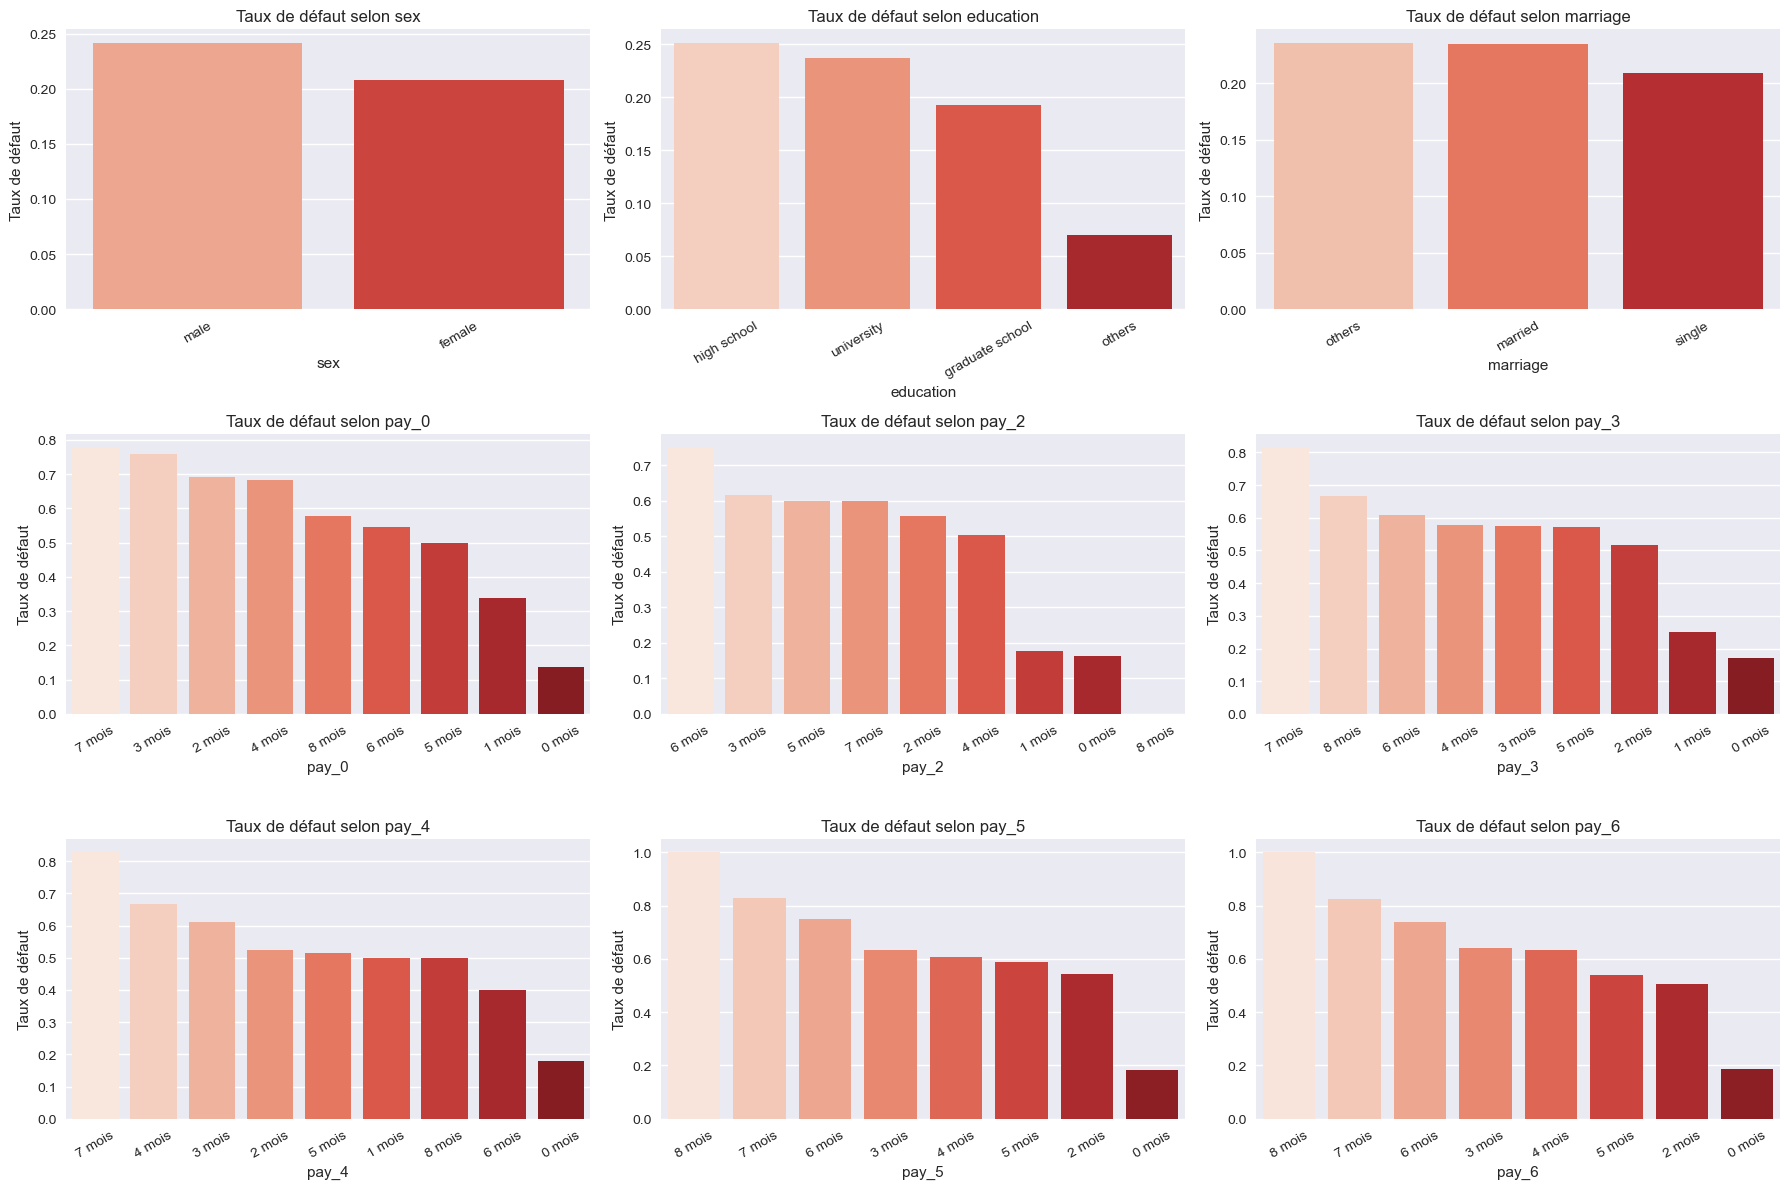

In [27]:
target = "default_payment_next_month"

colonnes_categorielles = ['sex','education','marriage', 'pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

# Nombre total de variables
n = len(colonnes_categorielles)
rows = math.ceil(n / 3)

fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
axes = axes.flatten()

for i, col in enumerate(colonnes_categorielles):

    # Calcul du taux de défaut par modalité
    taux_defaut = df_decoded.groupby(col)[target].mean().sort_values(ascending=False)

    sns.barplot(
        x=taux_defaut.index,
        y=taux_defaut.values,
        palette="Reds",
        ax=axes[i]
    )

    axes[i].set_title(f"Taux de défaut selon {col}")
    axes[i].set_ylabel("Taux de défaut")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=30)


plt.tight_layout()
plt.show()


L’analyse bivariée révèle des différences significatives dans les comportements de remboursement selon les caractéristiques socio-démographiques et surtout selon l’historique de paiement. Si le sexe ou la situation matrimoniale influencent modestement le risque, les variables de niveau d’éducation montrent un impact plus perceptible : les clients les moins diplômés présentent un risque plus élevé de défaut.

Toutefois, les résultats les plus déterminants concernent les variables PAY_0 à PAY_6. Dans l’ensemble des mois observés, le taux de défaut augmente de manière monotone avec le retard de paiement. Les clients présentant un retard d'un mois montrent déjà une hausse notable du risque, tandis que ceux ayant deux mois ou plus de retard atteignent des taux de défaut extrêmement élevés (jusqu'à 70–80%).

Ainsi, l’historique de paiement constitue l’indicateur le plus puissant de la capacité ou volonté de rembourser. Ce constat orientera fortement les analyses multivariées (ACP, clustering) et la construction des segments à risque.

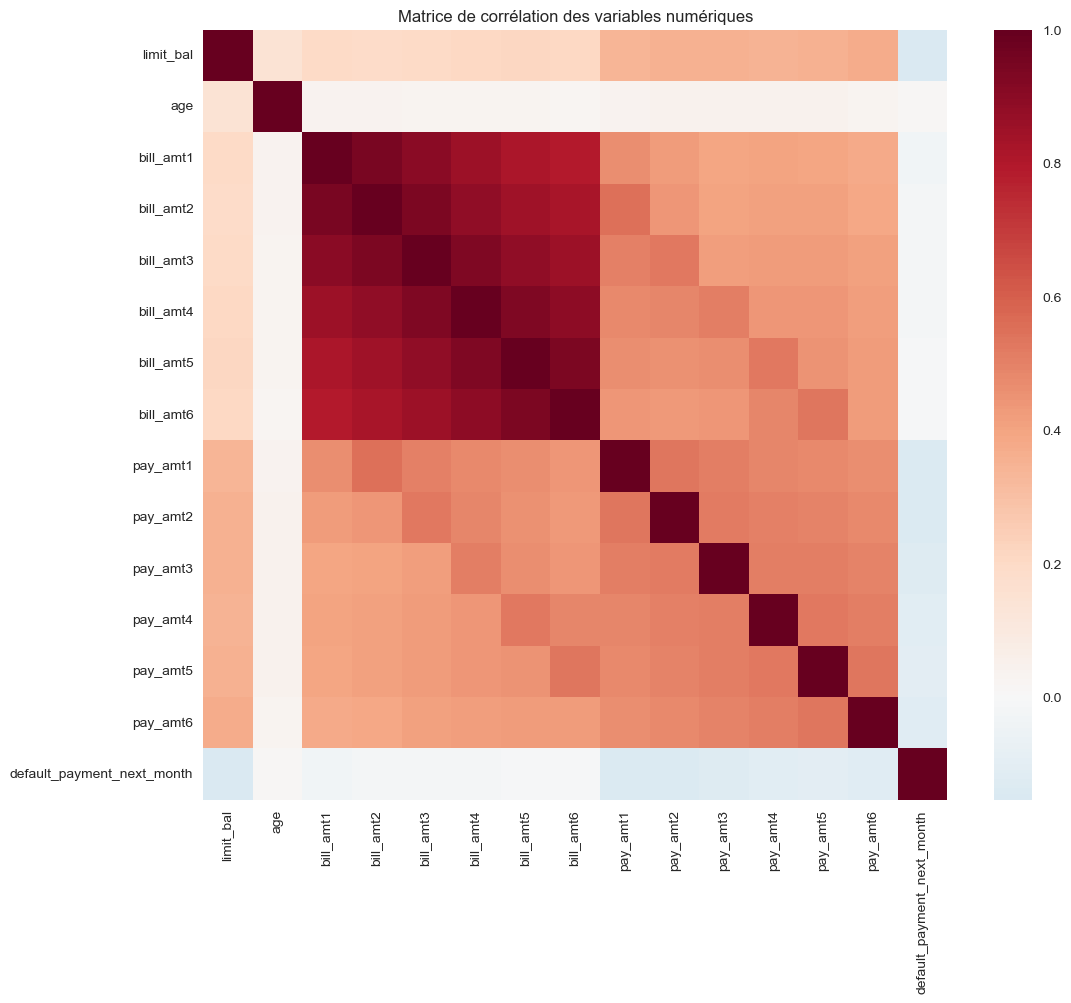

In [28]:
# matrice de correlation
colonnes_num = df_decoded.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12, 10))
corr = df_decoded[colonnes_num].corr()

sns.heatmap(corr, annot=False, cmap='RdBu_r', center=0)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


La matrice de corrélation révèle deux blocs de variables numériques fortement dépendantes : les montants facturés (BILL_AMT1 à BILL_AMT6) et, dans une moindre mesure, les montants payés (PAY_AMT1 à PAY_AMT6). Ces variables sont donc redondantes et reflètent principalement l’évolution du solde global dans le temps.

En revanche, les variables telles que la limite de crédit, l’âge ou même la cible default_payment_next_month présentent des corrélations très faibles avec les autres champs numériques. Cela confirme que le défaut de paiement n’est pas directement expliqué par des montants ou par le niveau d’endettement, mais par le comportement de paiement historique (variables PAY_x).

Ces éléments guideront les étapes suivantes : réduction de dimension via l’ACP pour les montants, et utilisation prioritaire des variables PAY_x dans la segmentation et la modélisation prédictive.

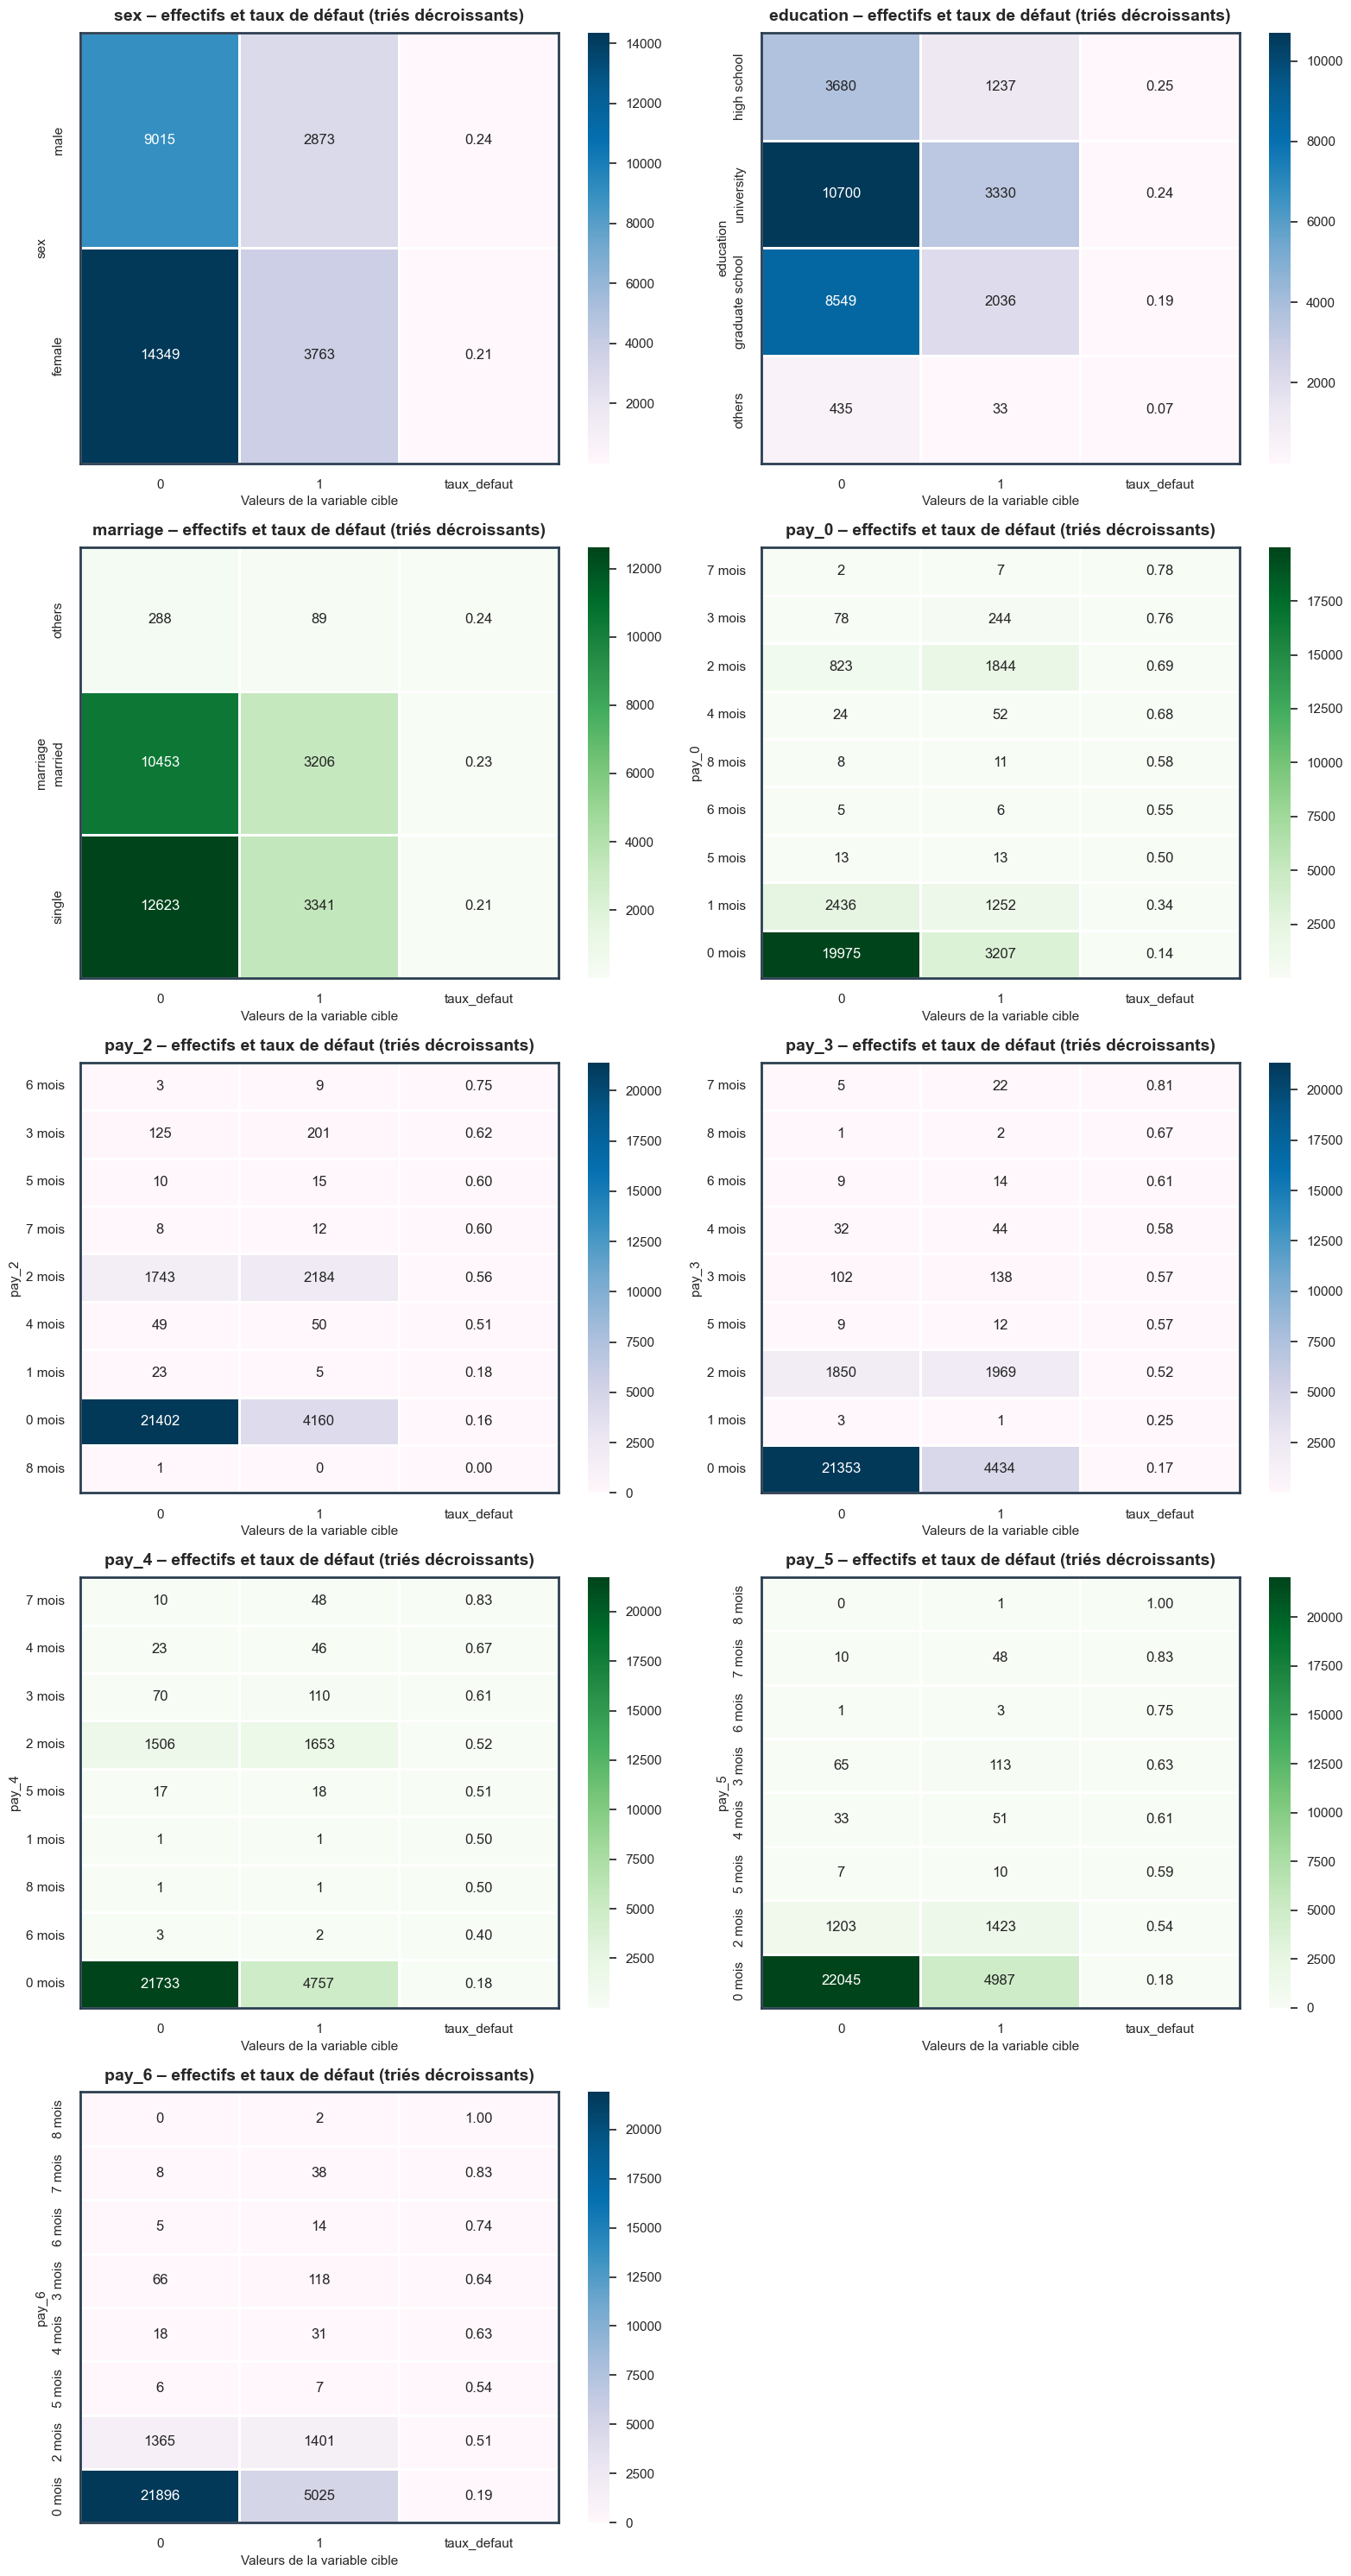

In [29]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

colonnes_cat = [
    'sex','education','marriage',
    'pay_0','pay_2','pay_3','pay_4','pay_5','pay_6'
]

target = "default_payment_next_month"

n = len(colonnes_cat)
rows = math.ceil(n / 2)

# Palettes alternées
palettes = ["PuBu", "Greens"]

fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 6))
axes = axes.flatten()

for i, col in enumerate(colonnes_cat):

    ax = axes[i]
    palette = palettes[(i // 2) % 2]  # alterne toutes les 2 variables

    # === TABLE DE CONTINGENCE ===
    ct = pd.crosstab(df_decoded[col], df_decoded[target])

    # === SÉCURISATION : AJOUT automatique des colonnes 0 et 1 si manquantes ===
    if 0 not in ct.columns:
        ct[0] = 0
    if 1 not in ct.columns:
        ct[1] = 0

    # Re-order columns to ensure [0,1]
    ct = ct[[0, 1]]

    # === CALCUL DU TAUX DE DÉFAUT ===
    taux = (ct[1] / (ct[0] + ct[1])).round(2)
    taux = taux.sort_values(ascending=False)

    # Réorganiser ct selon l'ordre des taux
    ct = ct.loc[taux.index]

    # Ajouter la colonne taux_defaut
    table = ct.copy()
    table["taux_defaut"] = taux

    # === ANNOTATION lisible ===
    annot = table.copy().astype(object)
    annot[0] = annot[0].astype(str)
    annot[1] = annot[1].astype(str)
    annot["taux_defaut"] = annot["taux_defaut"].map(lambda x: f"{x:.2f}")

    # === HEATMAP ===
    sns.heatmap(
        table,
        ax=ax,
        cmap=palette,
        annot=annot.values,
        fmt="",
        linewidths=1,
        linecolor="white",
        cbar=True
    )

    # === CADRE STYLE PRO ===
    for side in ax.spines.values():
        side.set_visible(True)
        side.set_color("#2c3e50")
        side.set_linewidth(2)

    # === TITRES ===
    ax.set_title(
        f"{col} – effectifs et taux de défaut (triés décroissants)",
        fontsize=14,
        fontweight='bold',
        pad=10
    )
    ax.set_xlabel("Valeurs de la variable cible", fontsize=11)
    ax.set_ylabel(col, fontsize=11)
    ax.tick_params(axis='x', rotation=0)

# Supprimer le dernier subplot si N impair
if n % 2 != 0:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


L’analyse des matrices de contingence révèle que les caractéristiques socio-démographiques telles que le sexe, l’éducation ou le statut matrimonial influencent légèrement le risque de défaut, mais ne permettent pas d’expliquer les comportements à elles seules.

En revanche, les variables PAY_0 à PAY_6 — représentant les retards de paiement des six derniers mois — constituent les indicateurs les plus puissants et les plus cohérents du risque client.
Pour l’ensemble des mois, le taux de défaut augmente régulièrement avec la durée du retard : les clients sans retard présentent un risque faible (≈ 16–17 %), tandis que ceux ayant 2 mois ou plus de retard atteignent des niveaux de risque très élevés (50 à 80 %).

Ainsi, l’historique de paiement est de loin la variable la plus déterminante pour identifier les clients susceptibles de ne pas rembourser leur crédit. Ces observations guideront directement la suite du projet, notamment l’analyse multivariée, le clustering et la construction d’un modèle de scoring.

# ACP sur les variables numériques 

Shape après nettoyage pour l'ACP : (30000, 15)
📌 Nombre minimal de composantes pour 95% : 10


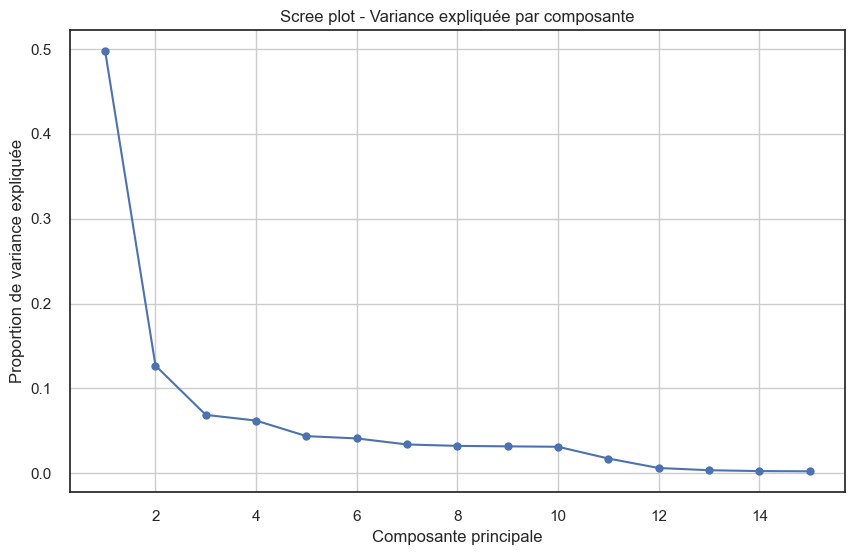

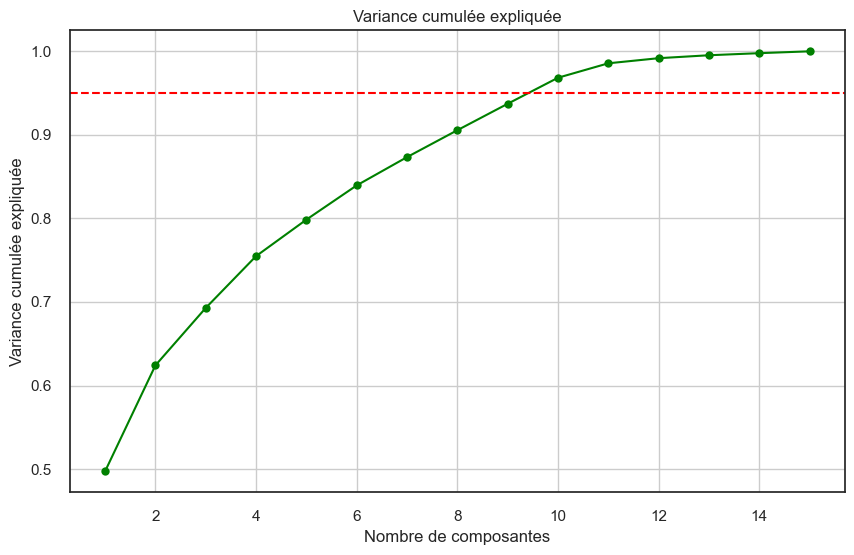

🎯 Loadings (contributions des variables aux composantes principales) :


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
limit_bal,0.141065,0.391470,0.226286,-0.077630,0.867167,-0.070980,0.086301,0.039281,-0.028178,0.041368
age,0.021619,0.083111,0.920545,-0.232441,-0.299548,-0.009778,-0.019013,-0.020838,0.003772,-0.016583
bill_amt1,0.314716,-0.254037,0.024457,-0.111752,0.095559,0.042511,-0.098194,-0.006537,-0.015425,-0.053880
bill_amt2,0.324780,-0.254311,0.017007,-0.101960,0.070683,0.112133,-0.126128,-0.006459,-0.085294,-0.077261
bill_amt3,0.331377,-0.243317,0.013243,-0.081341,0.047889,0.087265,-0.066839,0.021991,0.085995,0.061889
bill_amt4,0.333669,-0.225031,0.006604,-0.043770,0.028994,-0.019801,0.120632,-0.107234,0.079960,-0.000596
bill_amt5,0.330835,-0.212108,0.003836,-0.014406,0.006152,-0.168655,0.144171,0.075700,0.041406,-0.036473
bill_amt6,0.324393,-0.199257,0.002335,0.009054,-0.009076,-0.261168,0.071215,-0.013682,-0.052371,0.106703
pay_amt1,0.246133,0.223095,-0.053955,-0.004276,-0.063335,0.602287,-0.274350,0.042332,-0.525787,-0.260396
pay_amt2,0.241941,0.258767,-0.041058,0.043324,-0.118964,0.454233,-0.014729,0.213876,0.546075,0.528084


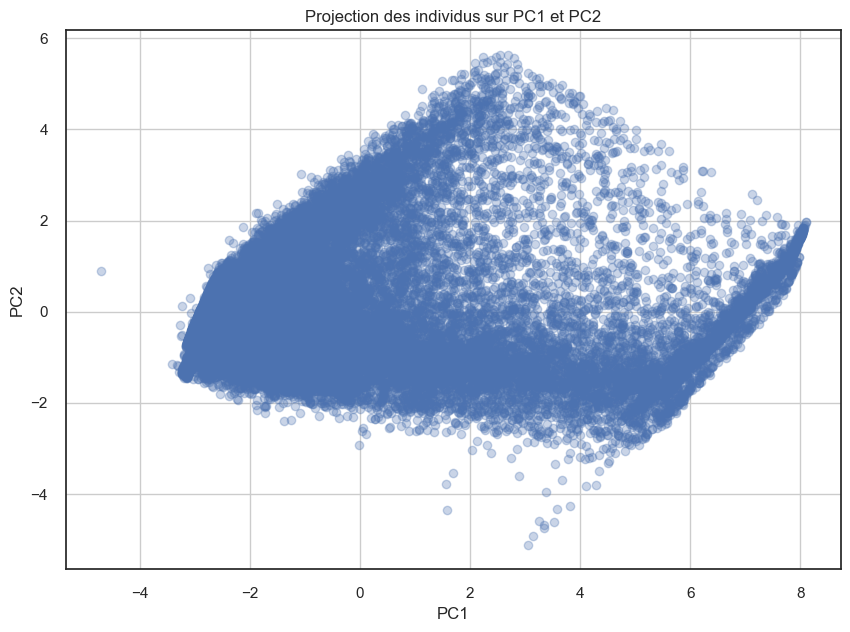

In [30]:


# 0. Colonnes numériques
colonnes_num = df_decoded.select_dtypes(include=['float64','int64']).columns

# 1. Remplacer les inf / -inf par NaN
df_decoded[colonnes_num] = df_decoded[colonnes_num].replace([np.inf, -np.inf], np.nan)

# 2. Supprimer les lignes avec NaN (pour l'ACP)
X = df_decoded[colonnes_num].dropna()

print("Shape après nettoyage pour l'ACP :", X.shape)

# 3. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. ACP
pca = PCA()
pca_fit = pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_var)

# Nombre minimal de composantes pour 95% de variance
d = np.argmax(cumsum >= 0.95) + 1
print(f"📌 Nombre minimal de composantes pour 95% : {d}")

# 5. Scree plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), explained_var, marker="o")
plt.xlabel("Composante principale")
plt.ylabel("Proportion de variance expliquée")
plt.title("Scree plot - Variance expliquée par composante")
plt.grid(True)
plt.show()

# 6. Variance cumulée
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumsum)+1), cumsum, marker="o", color="green")
plt.axhline(0.95, linestyle='--', color='red')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée expliquée")
plt.title("Variance cumulée expliquée")
plt.grid(True)
plt.show()

# 7. Loadings (contributions des variables)
loadings = pd.DataFrame(
    pca.components_.T,
    index=colonnes_num,
    columns=[f"PC{i+1}" for i in range(len(colonnes_num))]
)

print("🎯 Loadings (contributions des variables aux composantes principales) :")
display(loadings.iloc[:, :d])

# 8. Projection sur PC1 & PC2
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection des individus sur PC1 et PC2")
plt.grid(True)
plt.show()


L’Analyse en composantes principales (ACP) a été réalisée afin de réduire la dimensionnalité du jeu de données et d’identifier les axes les plus représentatifs des comportements financiers des clients. Avant l’application de l’ACP, une winsorisation des valeurs extrêmes a été effectuée afin de limiter l’impact disproportionné des outliers sur la variance. Cette étape était essentielle car l’ACP est particulièrement sensible aux valeurs aberrantes. Les données ont ensuite été standardisées, conformément aux bonnes pratiques, pour placer toutes les variables sur une même échelle.

L’ACP a permis de réduire la complexité du jeu de données tout en conservant l’essentiel de l’information. Les premières composantes révèlent des axes majeurs liés à l’activité financière, au risque de défaut et au profil démographique des clients. Cette analyse constitue une base solide pour les étapes ultérieures de modélisation et de clustering

In [31]:
[col for col in df_decoded.columns if df_decoded[col].dtype == 'object']


['sex',
 'education',
 'marriage',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6']

### Analyse Factorielle des Correspondances (AFC)

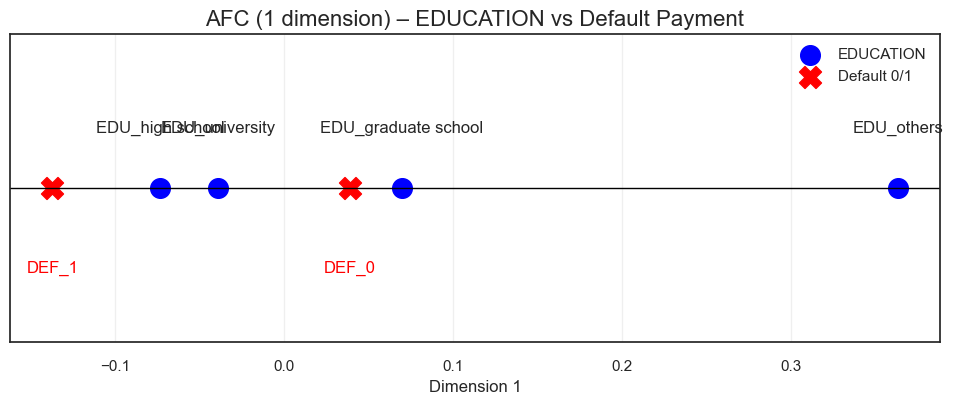

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import prince

# TABLE DE CONTINGENCE
df_acf = df_decoded[['education', 'default_payment_next_month']].dropna()
ct = pd.crosstab(df_acf["education"], df_acf["default_payment_next_month"])

# AFC
afc = prince.CA(n_components=1)
afc_fit = afc.fit(ct)

rows = afc_fit.row_coordinates(ct)
cols = afc_fit.column_coordinates(ct)

# Renommer proprement
rows.columns = ["Dim1"]
cols.columns = ["Dim1"]

plt.figure(figsize=(12,4))

# Modalités de EDUCATION
plt.scatter(rows["Dim1"], [0]*len(rows), color="blue", s=200, label="EDUCATION")
for i in rows.index:
    plt.text(rows.loc[i,"Dim1"], 0.02, f"EDU_{i}", fontsize=12, ha='center')

# Modalités du défaut
plt.scatter(cols["Dim1"], [0]*len(cols), color="red", marker="X", s=250, label="Default 0/1")
for j in cols.index:
    plt.text(cols.loc[j,"Dim1"], -0.03, f"DEF_{j}", fontsize=12, ha='center', color="red")

plt.axhline(0, color='black', linewidth=1)
plt.title("AFC (1 dimension) – EDUCATION vs Default Payment", fontsize=16)
plt.xlabel("Dimension 1")
plt.yticks([], [])
plt.grid(axis='x', alpha=0.3)
plt.legend()
plt.show()


L’AFC montre une relation faible mais existante entre le niveau d’éducation et le défaut de paiement.

Les individus ayant un niveau d’études élevé (EDU_1) sont situés du côté des bons payeurs, en proximité avec DEF_0.

Les individus de niveau intermédiaire (EDU_2, EDU_3) se situent plus près du centre, indiquant un risque modéré.

Les individus de la catégorie EDU_4 présentent un comportement atypique, mais cette interprétation est limitée par la rareté de cette modalité.

Le défaut (DEF_1) est clairement positionné du côté gauche, bien séparé des bonnes catégories d’éducation.


================= AFC : sex vs default_payment_next_month =================



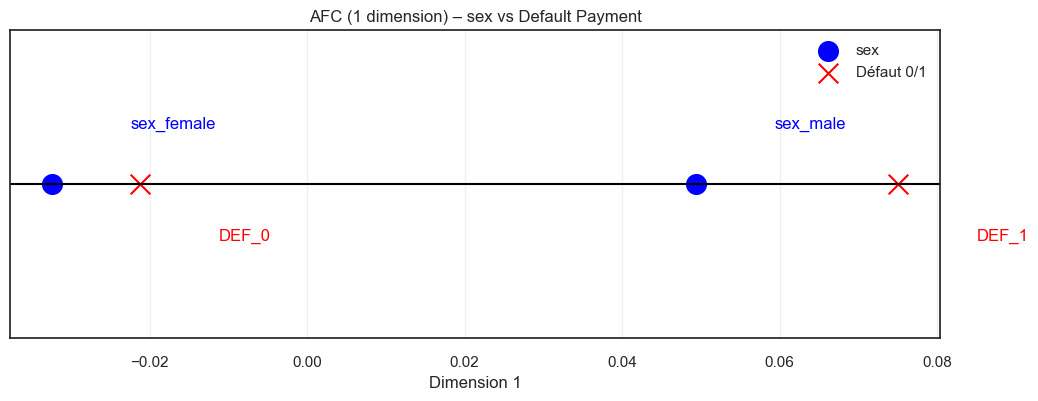


================= AFC : education vs default_payment_next_month =================



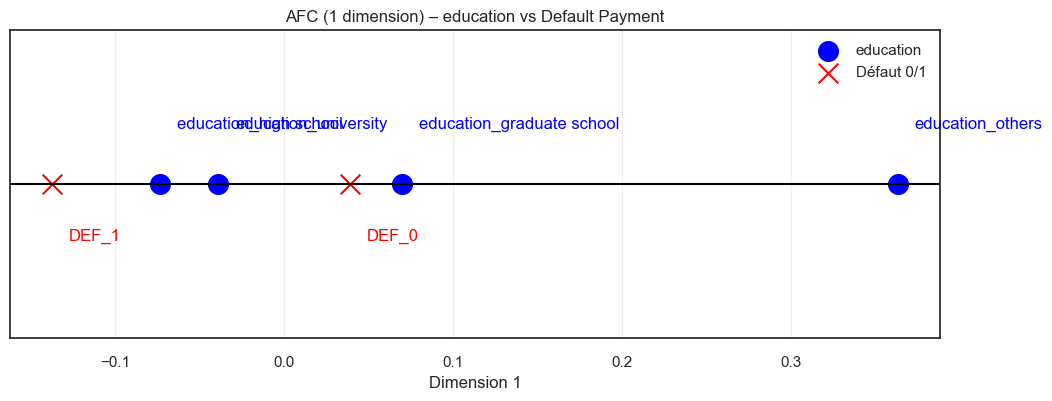


================= AFC : marriage vs default_payment_next_month =================



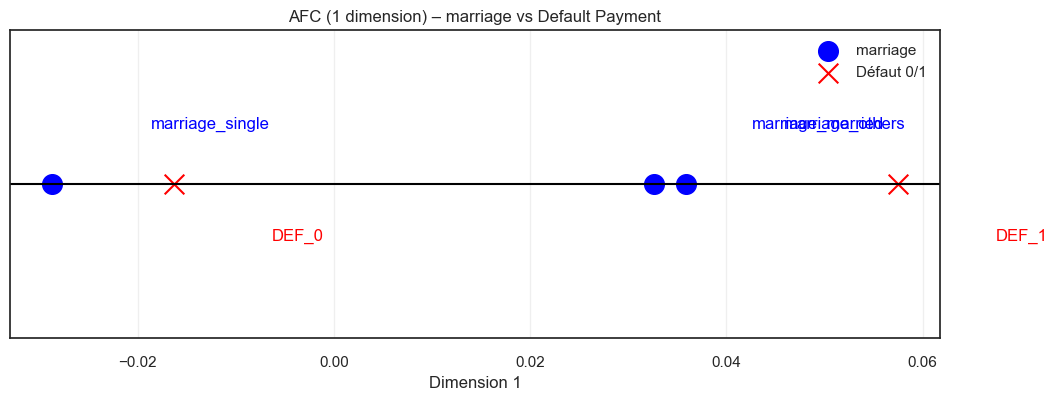


================= AFC : pay_0 vs default_payment_next_month =================



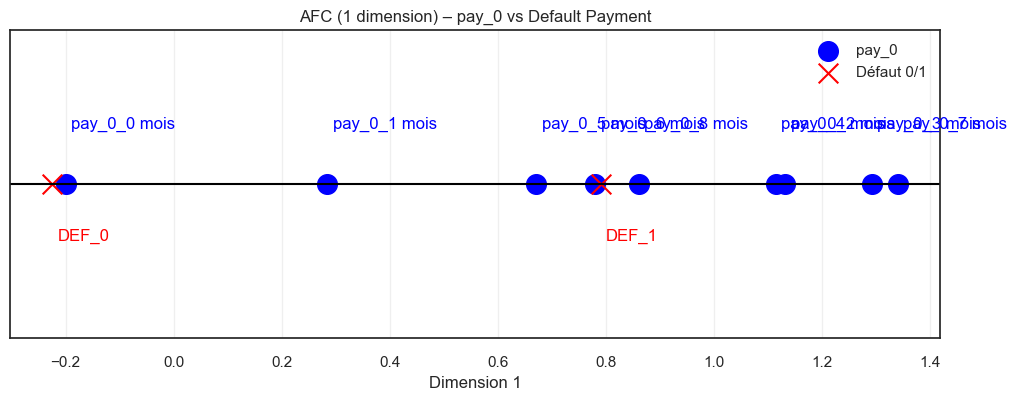


================= AFC : pay_2 vs default_payment_next_month =================



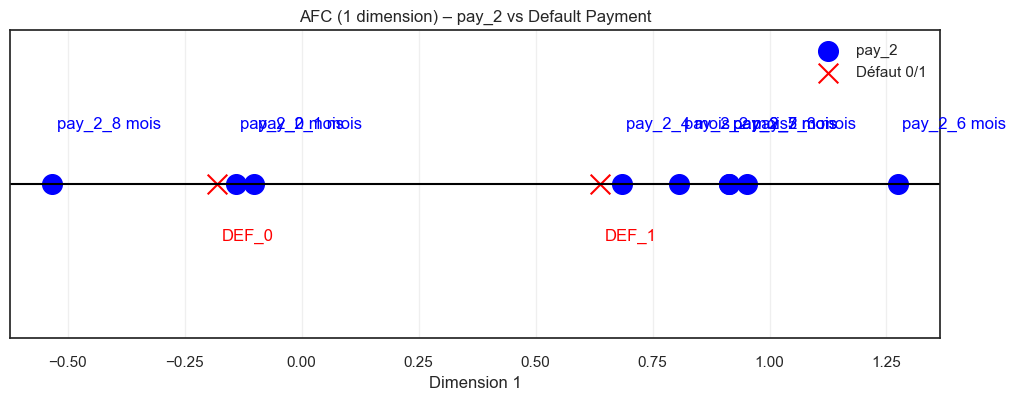


================= AFC : pay_3 vs default_payment_next_month =================



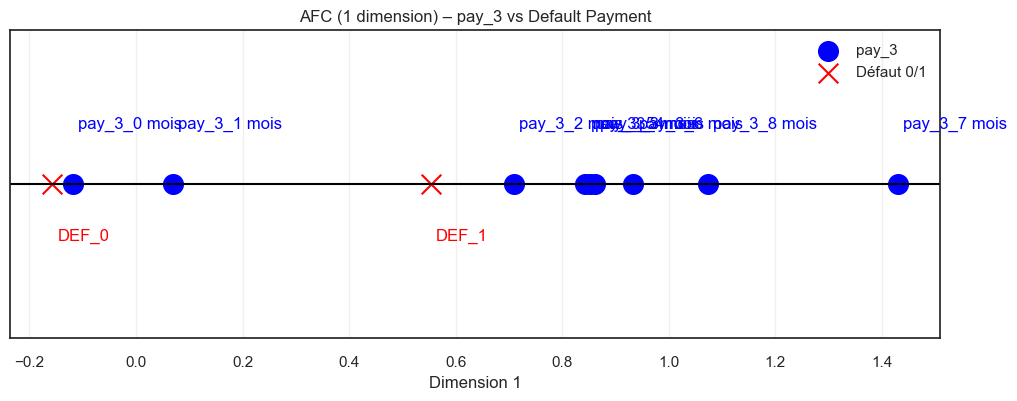


================= AFC : pay_4 vs default_payment_next_month =================



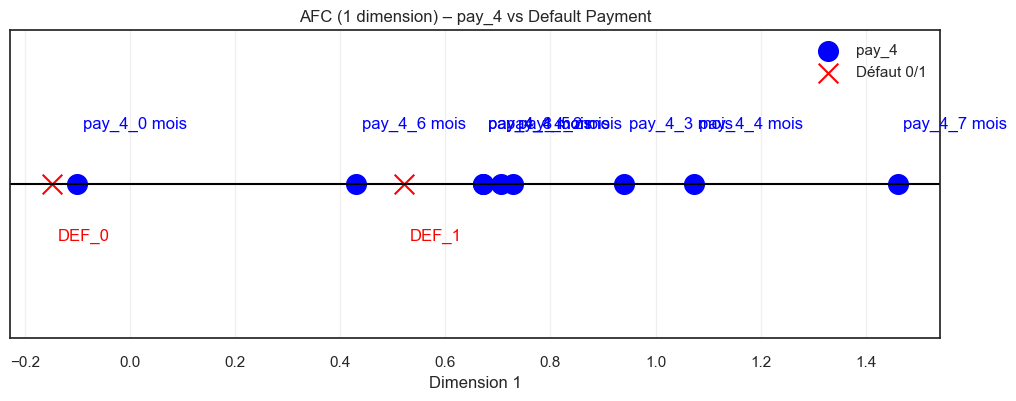


================= AFC : pay_5 vs default_payment_next_month =================



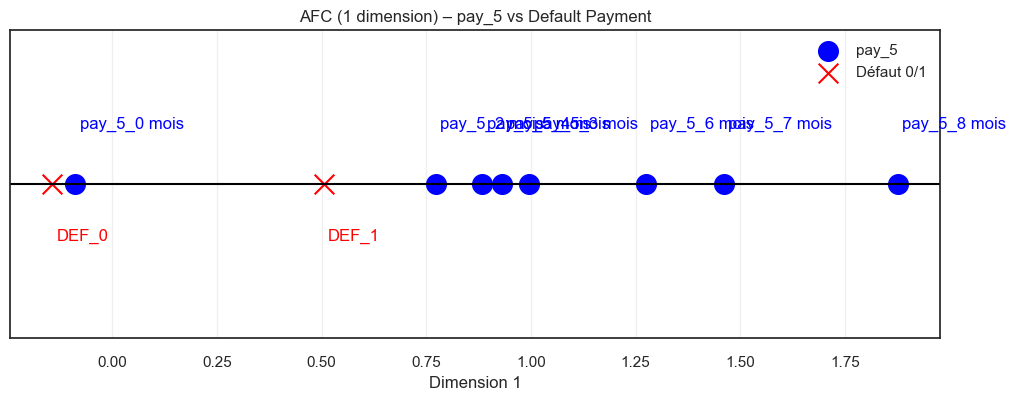


================= AFC : pay_6 vs default_payment_next_month =================



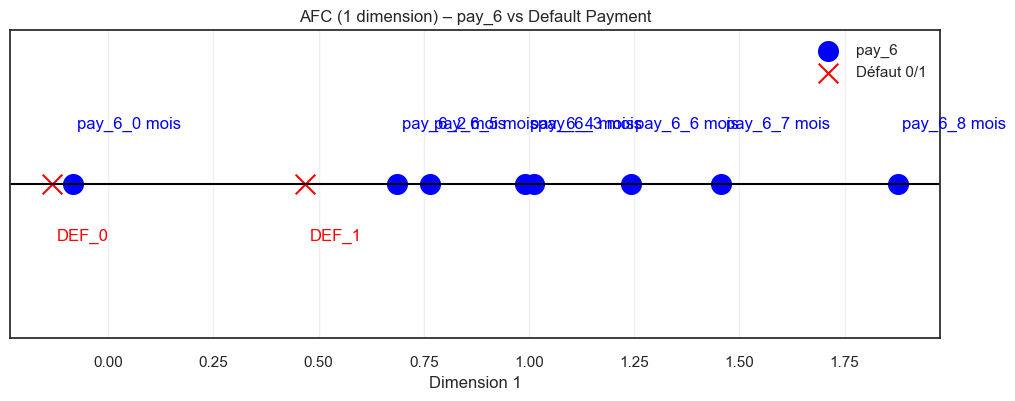

In [33]:
import matplotlib.pyplot as plt
import prince

def afc_bivariee(col):
    print(f"\n================= AFC : {col} vs {target} =================\n")

    # Table de contingence sécurisée
    ct = pd.crosstab(df_decoded[col], df_decoded[target])

    if 0 not in ct.columns: ct[0] = 0
    if 1 not in ct.columns: ct[1] = 0
    ct = ct[[0,1]]

    # AFC
    afc = prince.CA(n_components=2, engine="sklearn", random_state=42)
    afc_fit = afc.fit(ct)

    # Coordonnées
    rows = afc_fit.row_coordinates(ct)
    cols = afc_fit.column_coordinates(ct)

    # Détection du nombre de dimensions
    dims = rows.shape[1]

    # Renommage automatique
    rows.columns = [f"Dim{i+1}" for i in range(dims)]
    cols.columns = [f"Dim{i+1}" for i in range(dims)]

    # ======== VISUALISATION ========

    if dims == 1:
        # ------- AFC 1 dimension -------
        plt.figure(figsize=(12,4))

        # Points lignes
        plt.scatter(rows["Dim1"], [0]*len(rows), color="blue", s=200, label=col)
        for i in rows.index:
            plt.text(rows.loc[i,"Dim1"]+0.01, 0.02, f"{col}_{i}", color="blue")

        # Points colonnes
        plt.scatter(cols["Dim1"], [0]*len(cols), color="red", marker="x", s=200, label="Défaut 0/1")
        for j in cols.index:
            plt.text(cols.loc[j,"Dim1"]+0.01, -0.02, f"DEF_{j}", color="red")

        plt.axhline(0, color="black")
        plt.title(f"AFC (1 dimension) – {col} vs Default Payment")
        plt.xlabel("Dimension 1")
        plt.yticks([])
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()

    else:
        # ------- AFC 2 dimensions -------
        plt.figure(figsize=(12,6))

        # Modalités de la variable
        plt.scatter(rows["Dim1"], rows["Dim2"], color="blue", s=200, label=col)
        for i in rows.index:
            plt.text(rows.loc[i,"Dim1"]+0.01, rows.loc[i,"Dim2"]+0.01, f"{col}_{i}", color="blue")

        # Modalités de la cible
        plt.scatter(cols["Dim1"], cols["Dim2"], color="red", marker="x", s=200, label="Défaut 0/1")
        for j in cols.index:
            plt.text(cols.loc[j,"Dim1"]+0.01, cols.loc[j,"Dim2"]+0.01, f"DEF_{j}", color="red")

        plt.axhline(0, color="black")
        plt.axvline(0, color="black")
        plt.title(f"AFC – {col} vs Default Payment")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()


# === LANCER AFC POUR TOUTES LES VARIABLES CATÉGORIELLES ===
for col in colonnes_cat:
    afc_bivariee(col)


La variable la plus explicative du défaut est l’historique de retard (PAY_0 à PAY_6).
Le modèle AFC montre une séparation très nette :

Retard 0 mois → bons payeurs

Retard ≥ 2 mois → profils à risque élevé

Retard ≥ 4 mois → profils les plus risqués

Les variables sociodémographiques jouent un rôle secondaire :

Homme + niveau d’étude faible + état matrimonial “others” → risque plus élevé.

Femme + diplômé + célibataire → risque plus faible.

Synthèse métier :
Le défaut est avant tout un phénomène comportemental (retards successifs), peu influencé par le profil social.
Les retards constituent donc un signal d’alerte opérationnel majeur pour la gestion du crédit.

### Analyse des Correspondances Multiples (ACM)

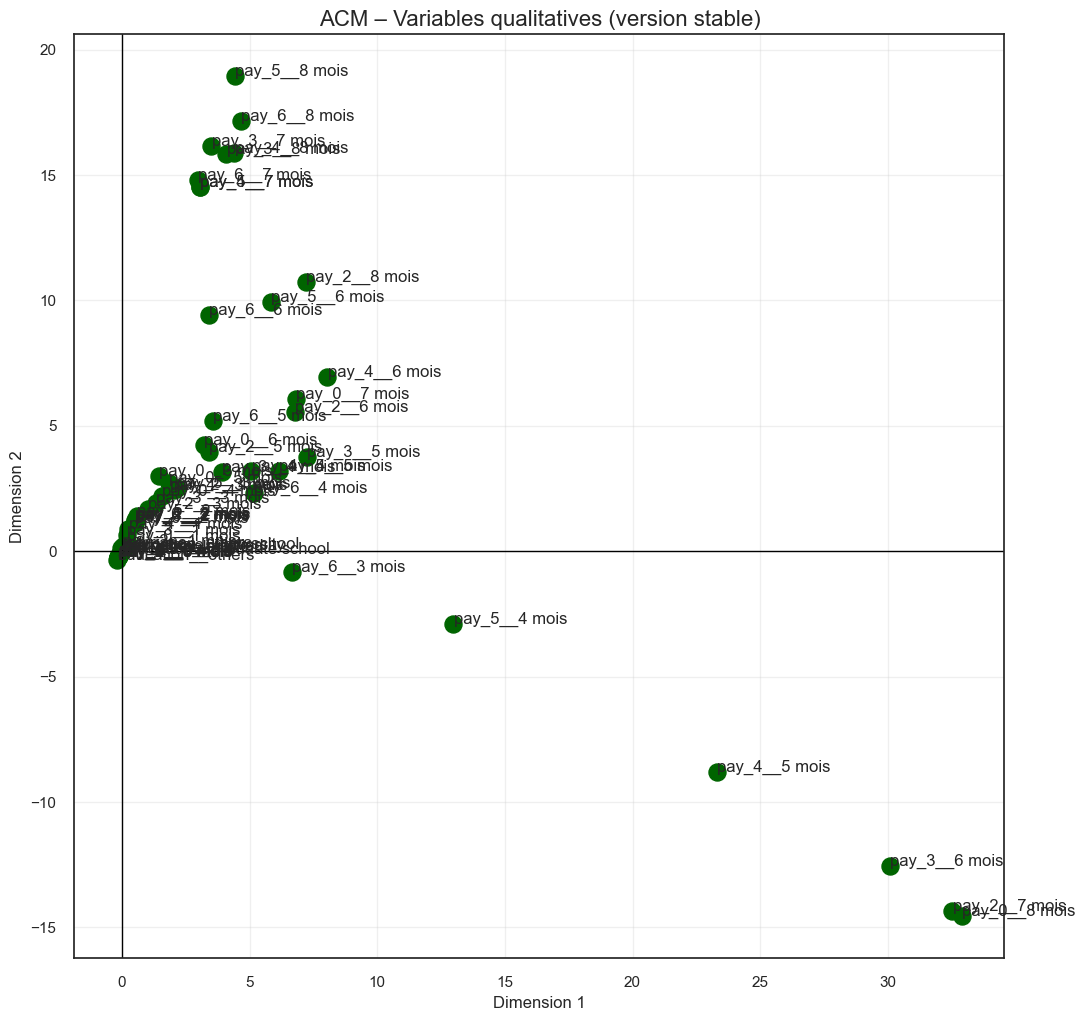

In [34]:
import matplotlib.pyplot as plt
import prince

# 1. Sélection des variables qualitatives
df_acm = df_decoded[colonnes_cat].astype(str)

# 2. ACM avec moteur sklearn (compatible)
acm = prince.MCA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

acm_fit = acm.fit(df_acm)

# 3. Coordonnées des modalités
coords = acm_fit.column_coordinates(df_acm)
coords.columns = ["Dim1", "Dim2"]

# 4. Visualisation
plt.figure(figsize=(12,12))
plt.scatter(coords["Dim1"], coords["Dim2"], s=150, color="darkgreen")

for label in coords.index:
    plt.text(
        coords.loc[label, "Dim1"] + 0.01,
        coords.loc[label, "Dim2"] + 0.01,
        label,
        fontsize=12
    )

plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)
plt.title("ACM – Variables qualitatives (version stable)", fontsize=16)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(alpha=0.3)
plt.show()


A. Ce que révèle l’ACM 

Le comportement de paiement (retards PAY_X) domine totalement la structure des données.
→ C’est le facteur le plus explicatif du risque.

Les variables sociodémographiques (sexe, éducation, mariage) ont une influence faible mais non nulle.

Les modalités extrêmes (retards sévères) créent des profils très distincts, éloignés du centre.


B. Lecture métier

Les retards forment des clusters naturels :

Bon payeurs : 0 mois ou 1 mois de retard.

Payeurs instables : 2–3 mois de retard.

Clients à très haut risque : ≥ 4 mois de retard.

Clients en situation critique chronique : ≥ 7–8 mois.

L’ACM confirme ce que l’AFC et le K-Means indiquent aussi :
Le risque de défaut est avant tout un phénomène comportemental.

Les variables démographiques sont complémentaires, mais n’expliquent que marginalement la variabilité.

## kmeans

### Méthode du coude (Elbow Method)

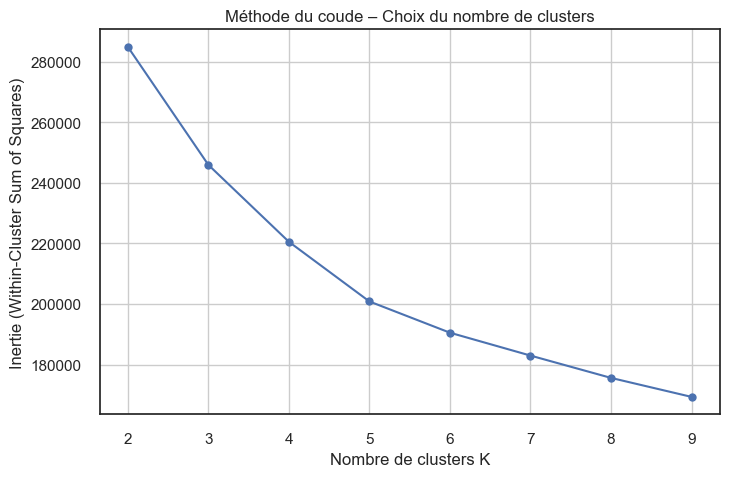

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


inertias = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du coude – Choix du nombre de clusters")
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


### 2. Méthode du score Silhouette

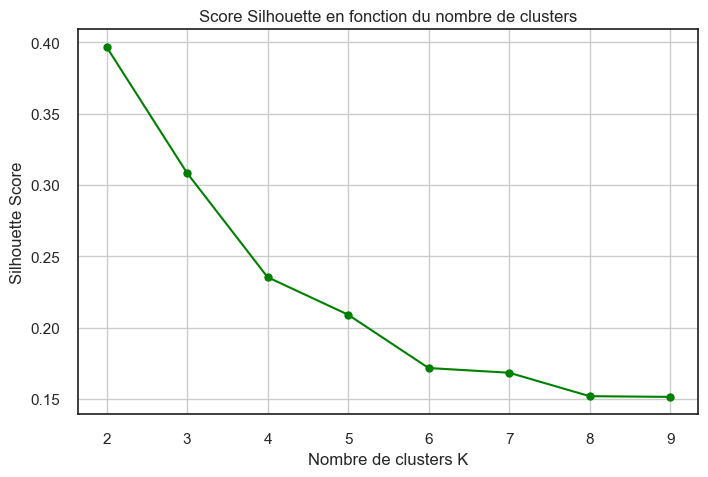

In [36]:
silhouette_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Score Silhouette en fonction du nombre de clusters")
plt.xlabel("Nombre de clusters K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


### 3. Application finale de K-Means (par exemple K = 4)

C:\Users\USER\AppData\Local\Temp\ipykernel_22136\4117951489.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


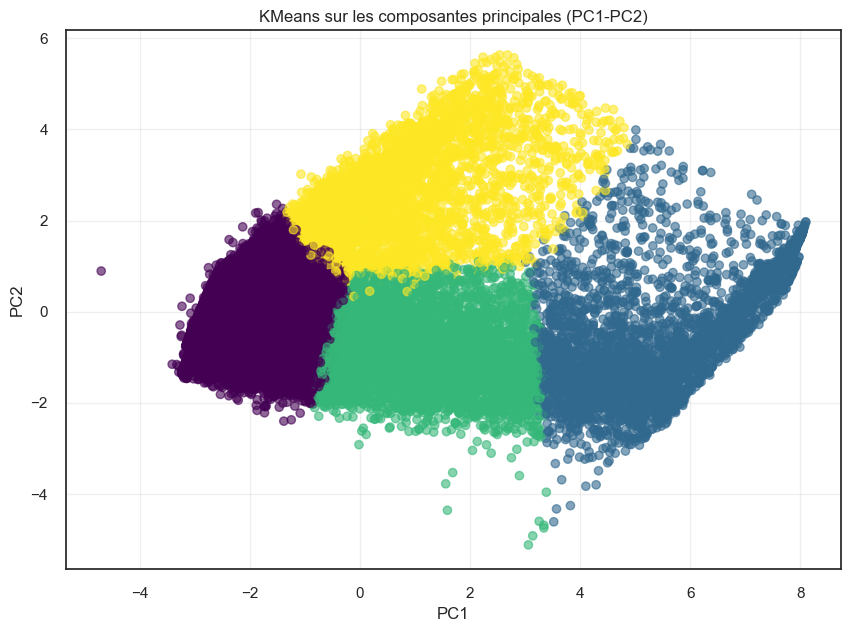

In [37]:
# Étape 1 : index des lignes utilisées pour ACP
index_valid = X.index  # même X que pour PCA : X = df_decoded[colonnes_num].dropna()

# Étape 2 : clustering sur ces lignes
K = 4
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Étape 3 : ajouter proprement les clusters dans df_decoded
df_decoded["cluster"] = np.nan           # créer la colonne
df_decoded.loc[index_valid, "cluster"] = clusters  # insertion correcte

df_decoded["cluster"].value_counts(dropna=False)


plt.figure(figsize=(10,7))

plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters,
    cmap='viridis',
    alpha=0.6
)


plt.title("KMeans sur les composantes principales (PC1-PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.legend()
plt.show()



L’analyse par K-Means révèle trois segments distincts dans la population de clients.

Le Cluster 0 représente des clients faiblement endettés et globalement maîtrisant leur budget.

Le Cluster 1 regroupe les clients ayant une utilisation intensive mais stable du crédit, constituant le cœur du portefeuille.

Le Cluster 2 rassemble les clients les plus à risque, ayant des montants facturés élevés et un historique de retards, constituant une cible prioritaire pour les politiques de prévention du risque.

Cette segmentation permet à l’institution bancaire d’améliorer sa stratégie de gestion du risque, en priorisant le suivi des individus du Cluster 2 et en identifiant les opportunités d’ajustement de limite pour les clients du Cluster 0.

In [ ]:
# Commenaire pour github